# LSTM Time Series - Stock Price Prediction
## Part 1 - Data Explanatory Analysis
This notebook focuses on examining the raw dataset containing daily historical prices of Google stocks. The goal is to identify a specific timeframe suitable for further analysis and prediction using LSTM.

> **INPUT**: The raw data file of all available stock prices of Google (Alphabet Inc.), as downloaded from its original source. <br/>
> **OUTPUT**: The extracted historical data of the targeted period for analysis, stored in an intermediary location for next steps.

### 1. INITIALIZATION

In [3]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

### 2. LOAD DATASET FILE

The dataset we are going to initially load and explore is the historical records of daily price details of Google (Alphabet Inc.) sourced from [Yahoo Finance](https://finance.yahoo.com/quote/GOOG).

At first, we load the complete dataset available spanning a period from 2004-08-19 up until the time of creating this script.

The main objective of loading the entire dataset is to choose a particular time frame for analysis.

In [35]:
stock_list = pd.read_csv(r"C:\Users\Jonat\Documents\GitHub\lstm-stock-price-prediction\data\ticker.csv")
stock_list = stock_list['tickers'].to_list()
stock_list

['AAPL',
 'AMZN',
 'GOOGL',
 'NVDA',
 'TSLA',
 'AVGO',
 'MSFT',
 'NFLX',
 'META',
 'MU',
 'TSM',
 'WMT',
 'V',
 'MA',
 'SMH',
 'SPY',
 'QQQ',
 'XLK',
 'XLC']

# For Loop

In [19]:
import os
import pandas as pd
import yfinance as yf
from tqdm import tqdm

# List of stock tickers to download
# stock_list = ["GOOGL", "AAPL"]  # Add your desired tickers here

# Define the directory where you want to save the files
output_dir = "..\\data\\raw\\"  # Replace with your desired directory path
os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists

# Define the date range for stock data
start_date = '2010-01-01'
end_date = '2024-12-17'

# Function to download stock data and save it to individual CSV
def download_and_save_stock_data(ticker):
    try:
        print(f"Downloading data for {ticker}...")

        # Download stock data
        stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)

        # Validate that data was retrieved
        if stock_data.empty:
            raise ValueError(f"No data found for {ticker}")

        # Ensure correct column order and headers
        stock_data = stock_data[["Open", "High", "Low", "Close", "Adj Close", "Volume"]]
        stock_data.index.name = "Date"  # Set the index name to "Date"

        # Save data to a CSV file dynamically named after the ticker
        file_name = f"{ticker.lower()}_stock_price.csv"
        output_path = os.path.join(output_dir, file_name)
        stock_data.to_csv(output_path, header=True)  # Save with headers

        print(f"File saved to: {output_path}")

    except Exception as e:
        error_message = f"Error downloading {ticker}: {str(e)}"
        print(error_message)

# Main function to iterate through tickers
def main():
    print("Starting sequential stock data download...")

    # Progress bar for the loop
    for ticker in tqdm(stock_list, desc="Downloading Stock Data"):
        download_and_save_stock_data(ticker)

    print("\nDownload Summary:")
    print("All stock data has been downloaded and saved successfully.")

if __name__ == "__main__":
    main()

Starting sequential stock data download...


File saved to: ..\data\raw\aapl_stock_price.csv


File saved to: ..\data\raw\amzn_stock_price.csv


File saved to: ..\data\raw\googl_stock_price.csv


File saved to: ..\data\raw\nvda_stock_price.csv


File saved to: ..\data\raw\tsla_stock_price.csv


File saved to: ..\data\raw\avgo_stock_price.csv


File saved to: ..\data\raw\msft_stock_price.csv


File saved to: ..\data\raw\nflx_stock_price.csv


File saved to: ..\data\raw\meta_stock_price.csv


File saved to: ..\data\raw\mu_stock_price.csv


File saved to: ..\data\raw\tsm_stock_price.csv


File saved to: ..\data\raw\wmt_stock_price.csv


File saved to: ..\data\raw\v_stock_price.csv


File saved to: ..\data\raw\ma_stock_price.csv


File saved to: ..\data\raw\smh_stock_price.csv


File saved to: ..\data\raw\spy_stock_price.csv


File saved to: ..\data\raw\qqq_stock_price.csv


File saved to: ..\data\raw\xlk_stock_price.csv


File saved to: ..\data\raw\xlc_stock_price.csv

Download Summary:
All stock data has been downloaded and saved successfully.


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# List of stock tickers to process
# stock_list = ['AAPL', 'AMZN', 'GOOGL', 'NVDA', 'TSLA', 'AVGO']

# Define data directories
raw_data_dir = "..\\data\\raw\\"
interim_data_dir = "..\\data\\interim\\"

# Ensure output directory exists
os.makedirs(interim_data_dir, exist_ok=True)

# Function to process stock data
def process_stock_data(ticker):
    try:
        # Prepare file names dynamically using f-strings
        input_file = f"{raw_data_dir}{ticker.lower()}_stock_price.csv"
        output_file = f"{interim_data_dir}{ticker.lower()}_stock_price_recent.csv"

        # Load data
        print(f"Processing {ticker}...")
        data = pd.read_csv(input_file)

        # Skip the first two rows
        data = data.iloc[2:]

        # Convert "Date" column to datetime format
        data["Date"] = pd.to_datetime(data["Price"])

        # Convert numerical columns to appropriate types
        data[["Open", "High", "Low", "Close", "Adj Close"]] = data[["Open", "High", "Low", "Close", "Adj Close"]].astype(float)
        data["Volume"] = data["Volume"].astype(int)

        # Drop the 'Price' column
        data = data.drop(columns=["Price"])

        # Plot Open and Close prices
        plt.figure(figsize=(18, 6))
        
        plt.subplot(1, 2, 1)
        plt.plot(data["Date"], data["Open"], label="Open Price")
        plt.xlabel("Time")
        plt.ylabel("Price (USD)")
        plt.title(f"{ticker} Open Stock Price")
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.plot(data["Date"], data["Close"], label="Close Price", color="orange")
        plt.xlabel("Time")
        plt.ylabel("Price (USD)")
        plt.title(f"{ticker} Close Stock Price")
        plt.grid()

        plt.suptitle(f"{ticker} Stock Price Over Time")
        plt.show()

        # Filter data for the last five years (from 2019)
        data_5years = data[data["Date"].dt.year >= 2019]

        # Plot Open stock price for the last five years
        plt.figure(figsize=(18, 6))
        plt.plot(data_5years["Date"], data_5years["Open"], label="Open Price", color="green")
        plt.xlabel("Time")
        plt.ylabel("Price (USD)")
        plt.title(f"{ticker} Open Stock Price - Starting From 2019")
        plt.grid()
        plt.show()

        # Save the filtered dataset
        data_5years.to_csv(output_file, index=False)
        print(f"Saved filtered data for {ticker} to {output_file}\n")

    except Exception as e:
        print(f"Error processing {ticker}: {str(e)}")

# Loop through all tickers in stock_list
def main():
    for ticker in stock_list:
        process_stock_data(ticker)

if __name__ == "__main__":
    main()
    print("All stock data processing completed successfully.")


# LSTM Time Series - Stock Price Prediction
## Part 2 - Data Preprocessing
This notebook focuses on processing the filtered dataset containing the historical prices of Google stocks over the past five years.

> **INPUT**: Filtered dataset containing Google's stock prices from the last five years, obtained from the previous phase. <br/>
> **OUTPUT**: Preprocessed and transformed data divided into training, validation, and testing subsets, stored in an interim location for the training phase.

Processing AAPL...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


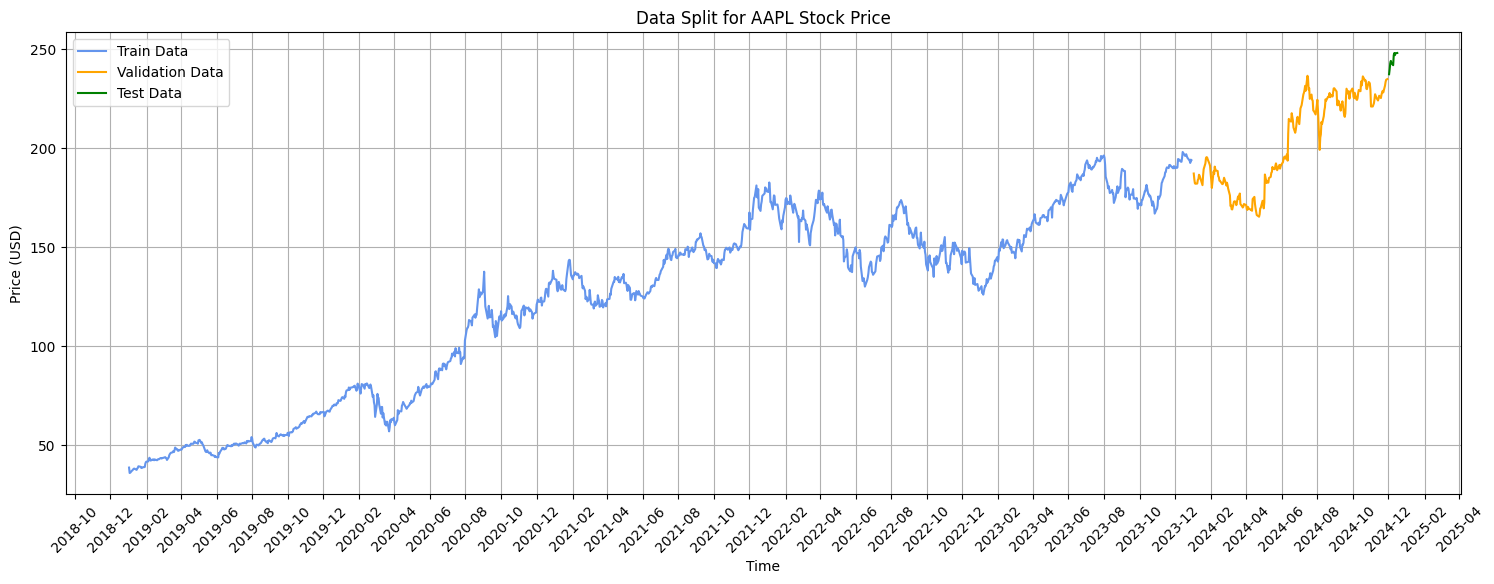

Saved processed data for AAPL.

Processing AMZN...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


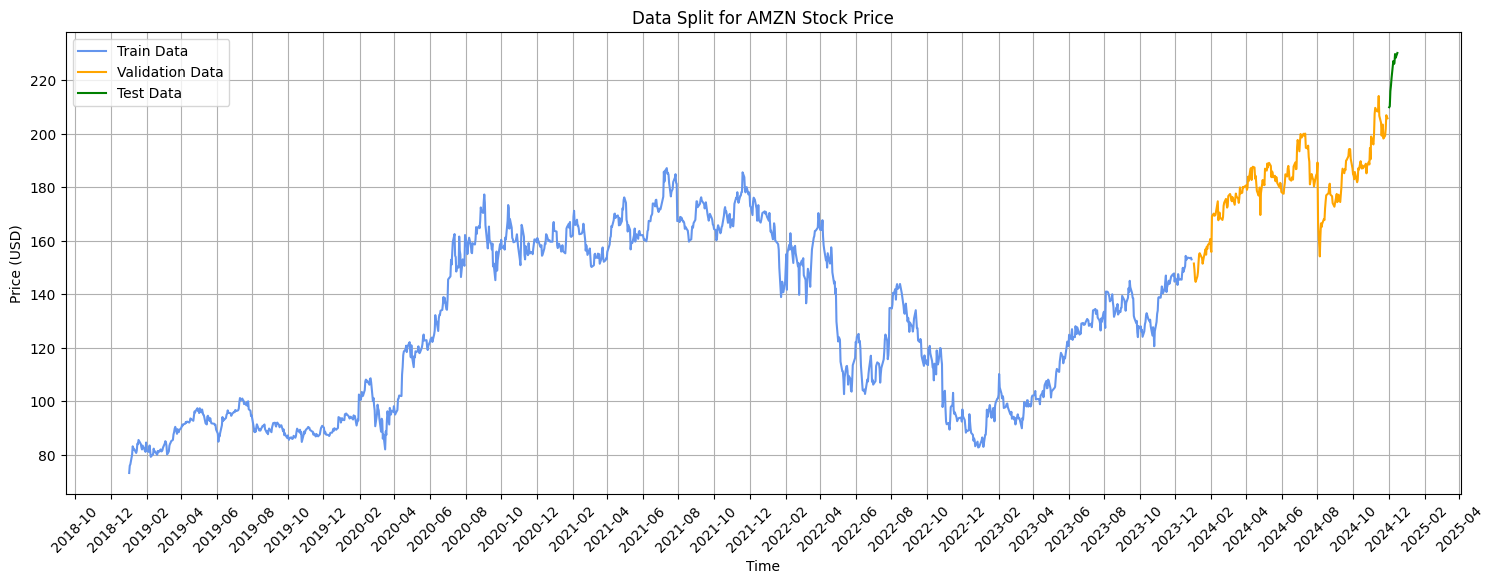

Saved processed data for AMZN.

Processing GOOGL...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


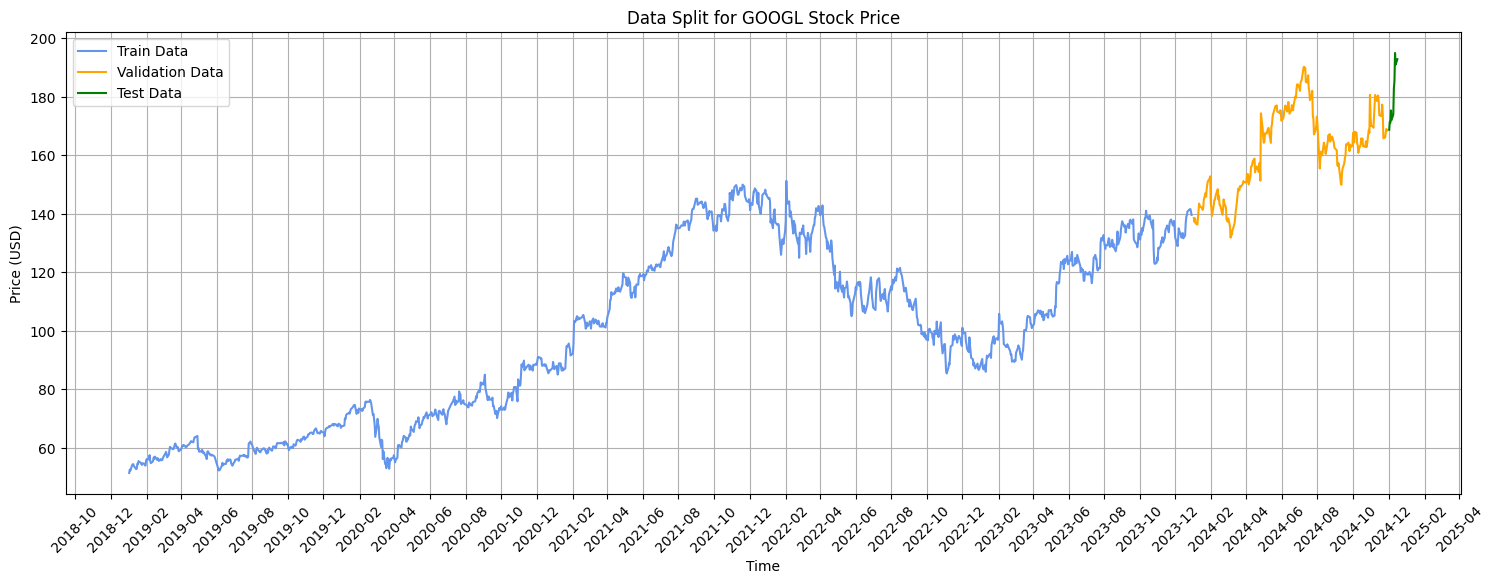

Saved processed data for GOOGL.

Processing NVDA...
Error processing NVDA: [Errno 2] No such file or directory: '..\\data\\interim\\nvda_stock_price_recent.csv'
Processing TSLA...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


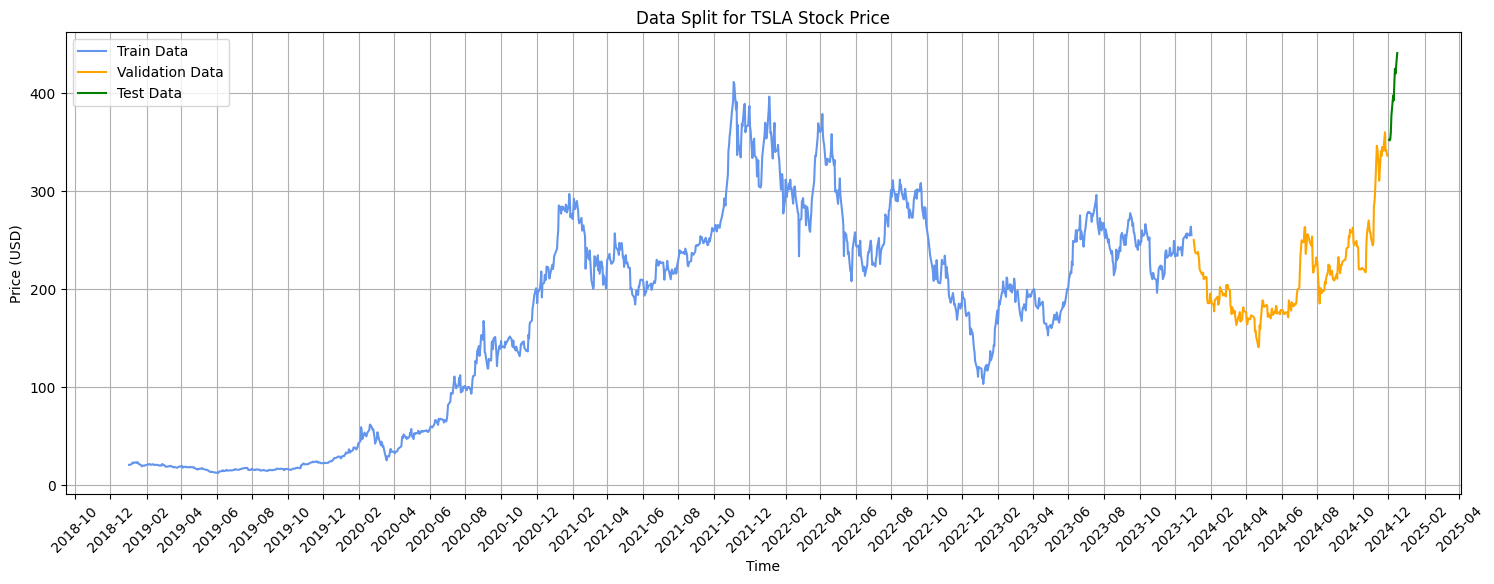

Saved processed data for TSLA.

Processing AVGO...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


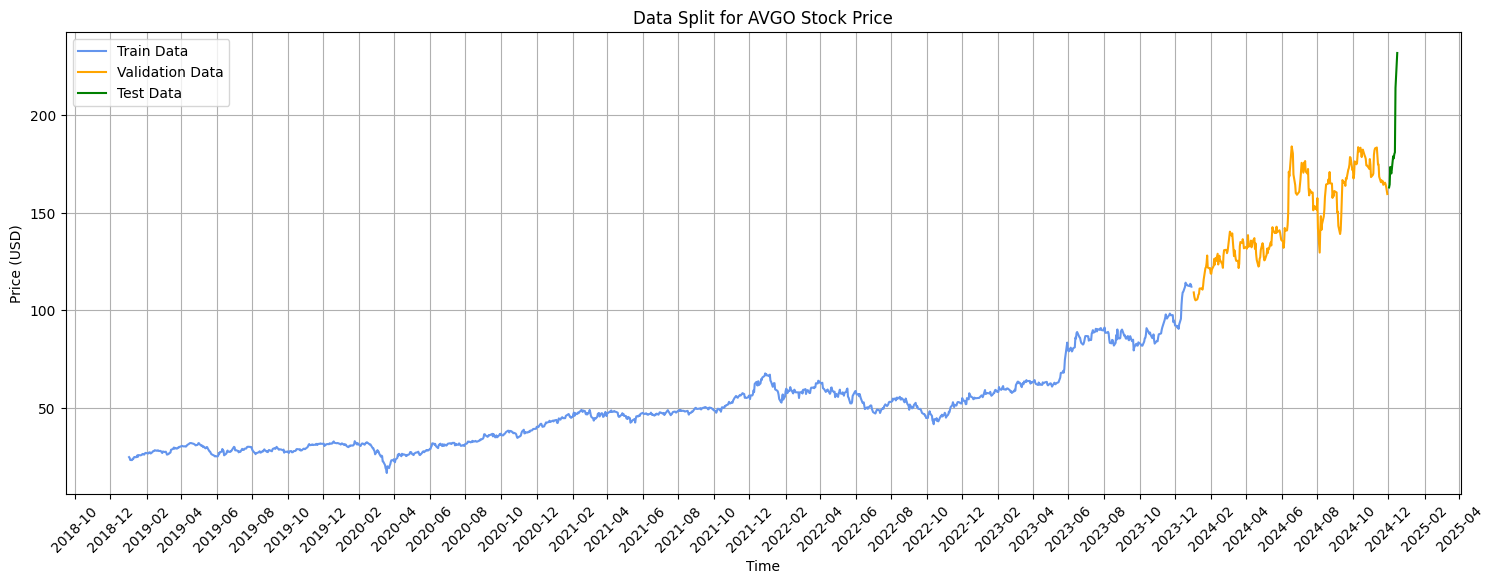

Saved processed data for AVGO.

Processing MSFT...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


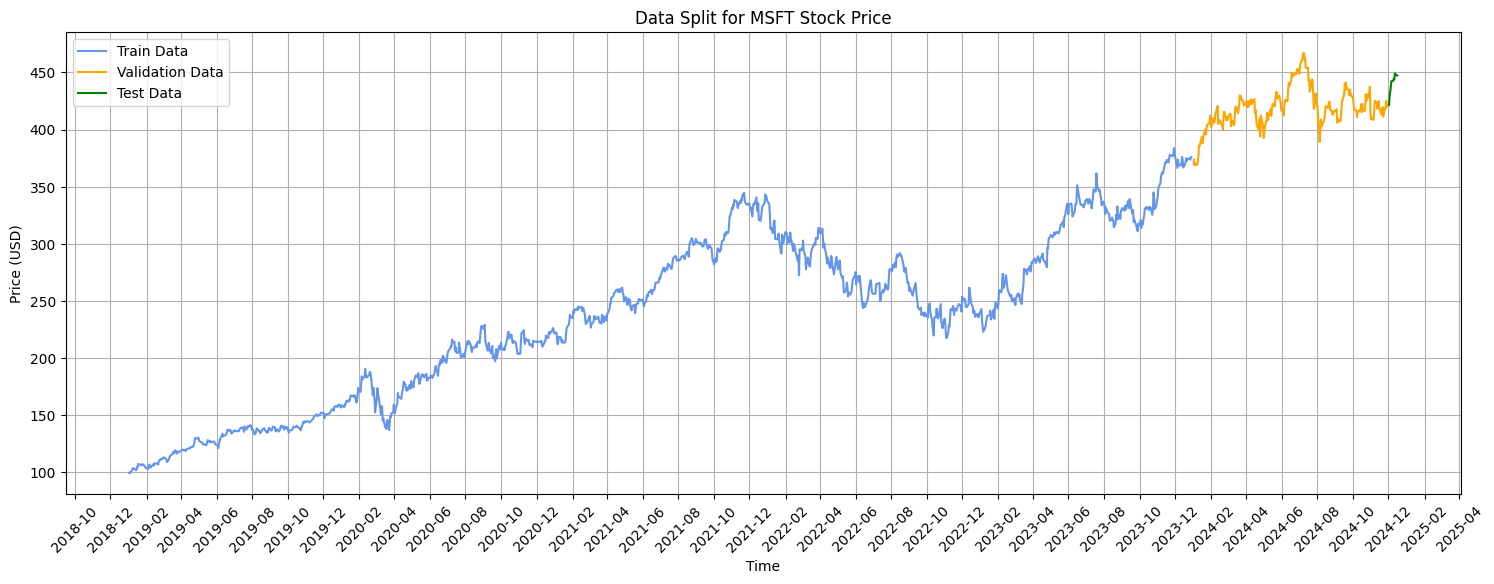

Saved processed data for MSFT.

Processing NFLX...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


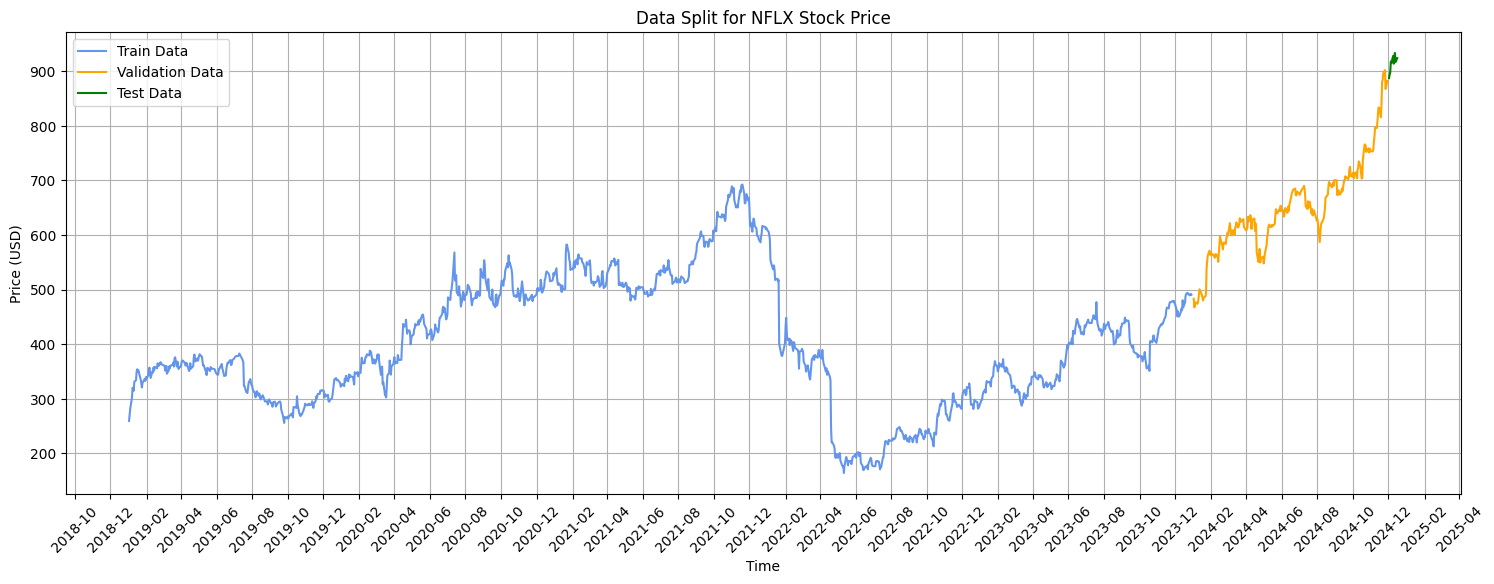

Saved processed data for NFLX.

Processing META...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


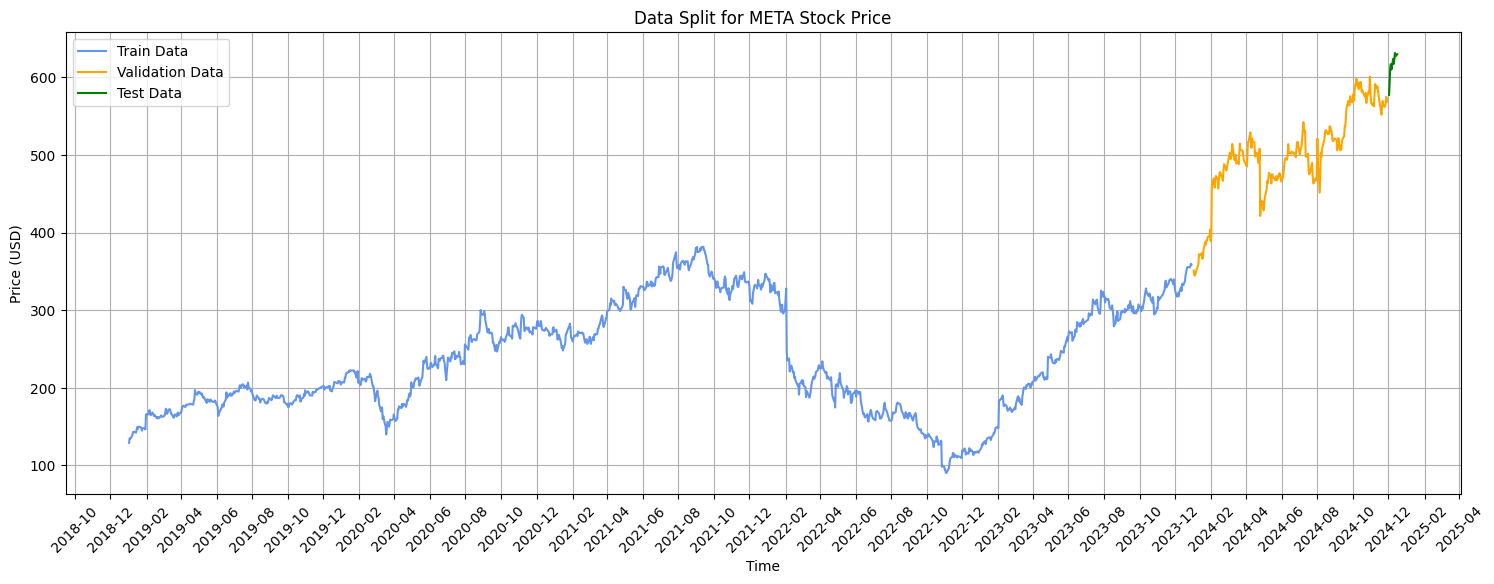

Saved processed data for META.

Processing MU...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


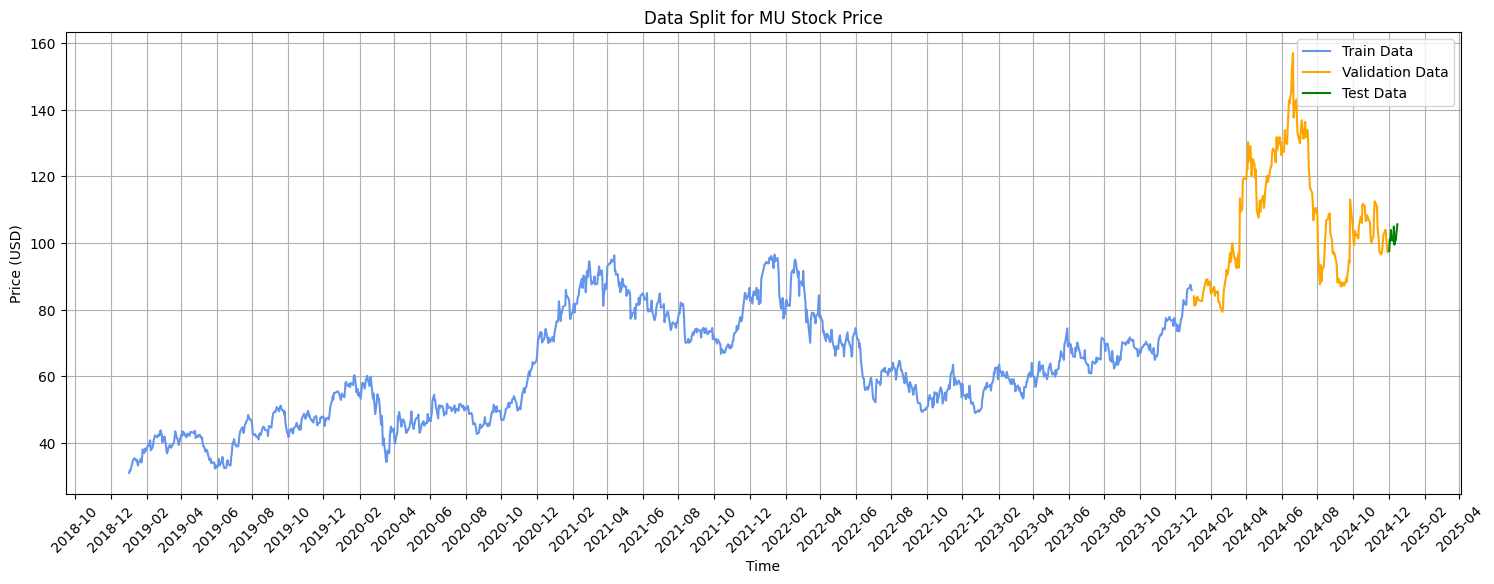

Saved processed data for MU.

Processing TSM...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


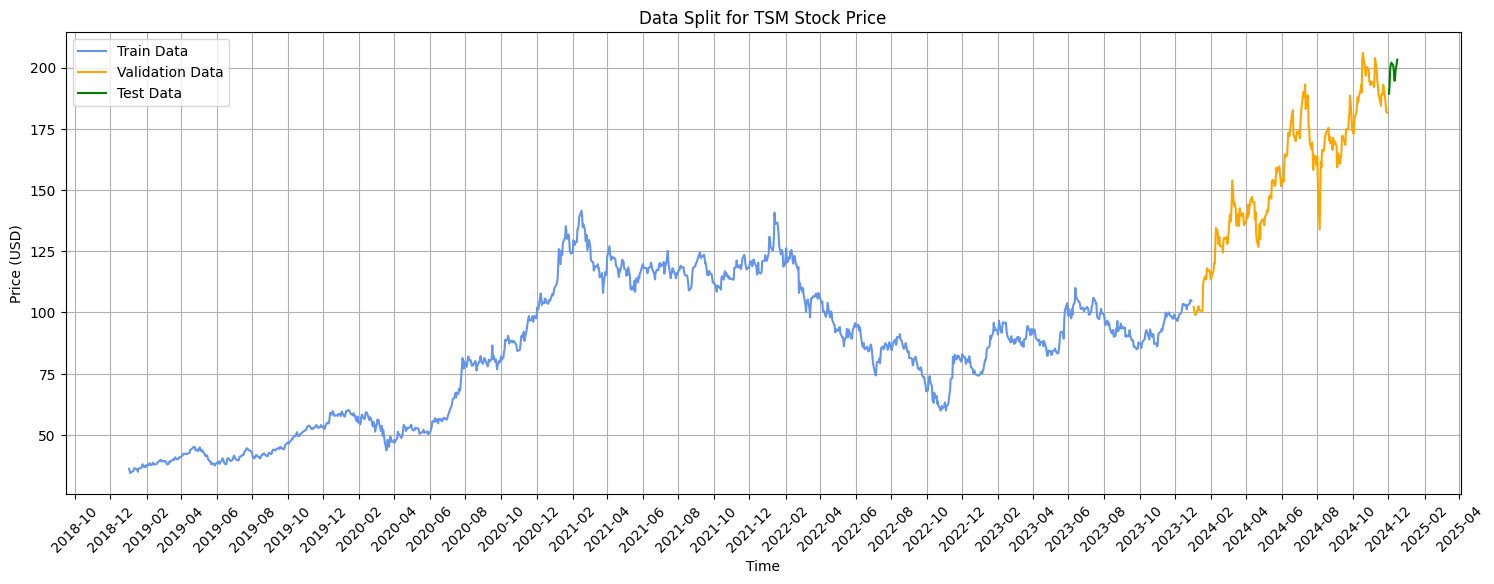

Saved processed data for TSM.

Processing WMT...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


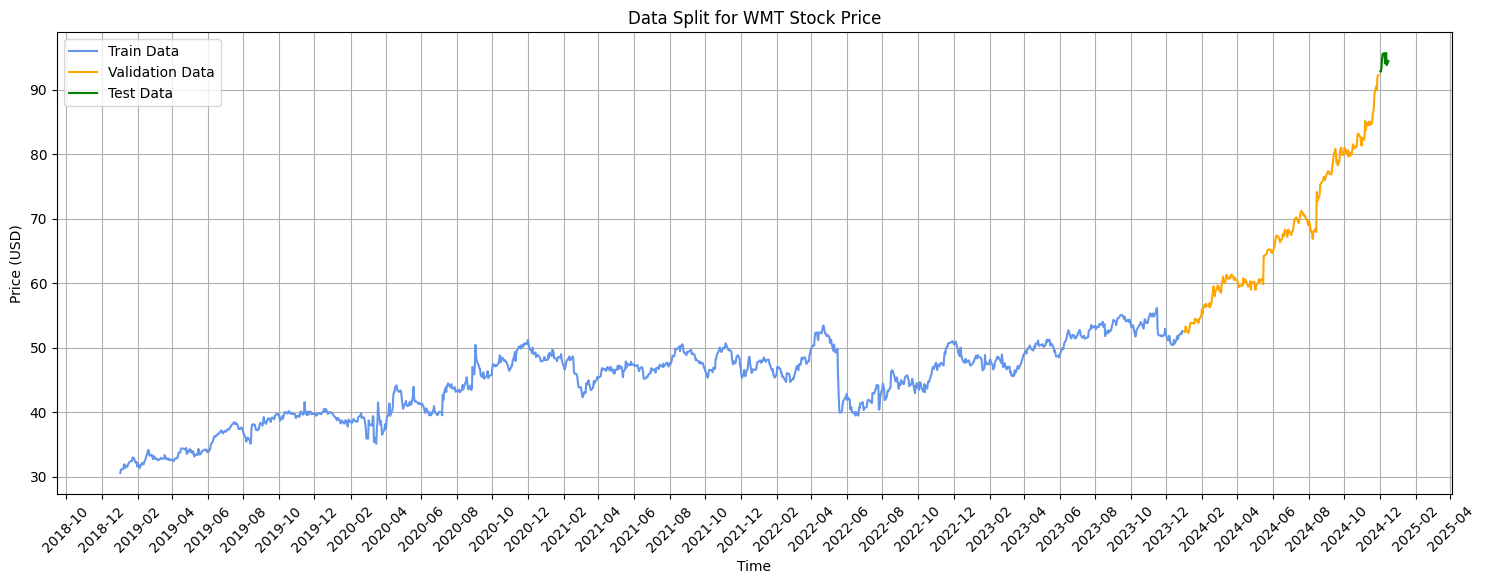

Saved processed data for WMT.

Processing V...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


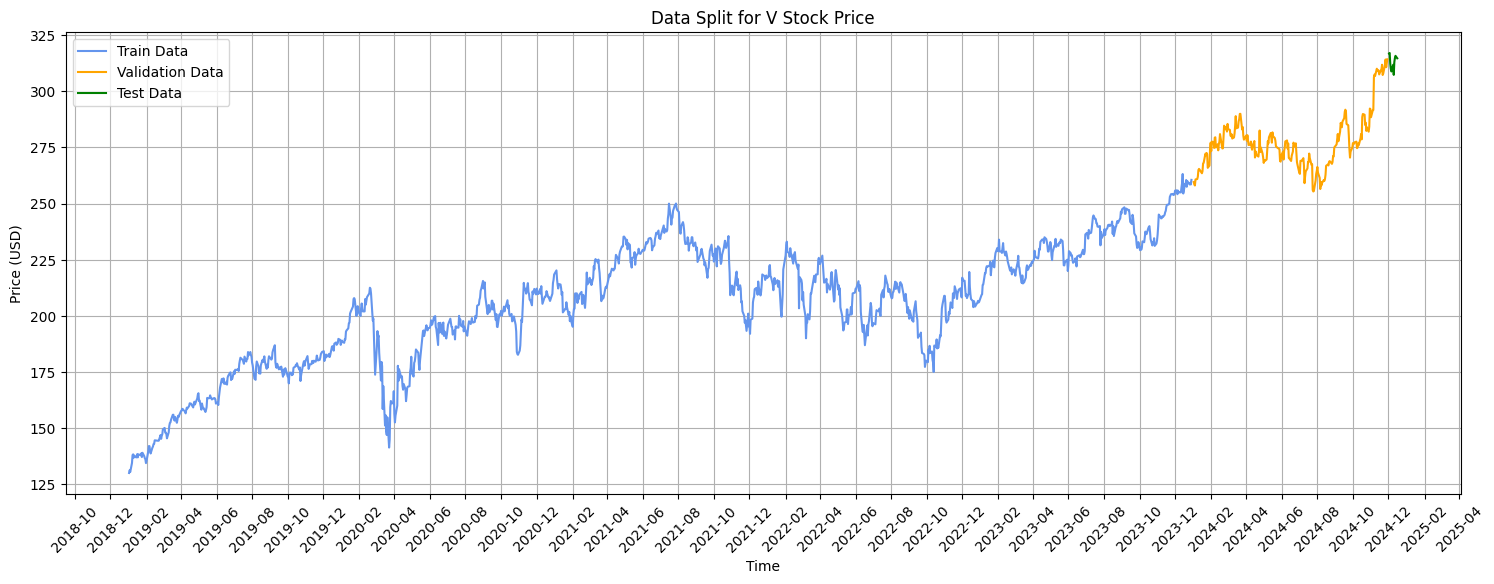

Saved processed data for V.

Processing MA...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


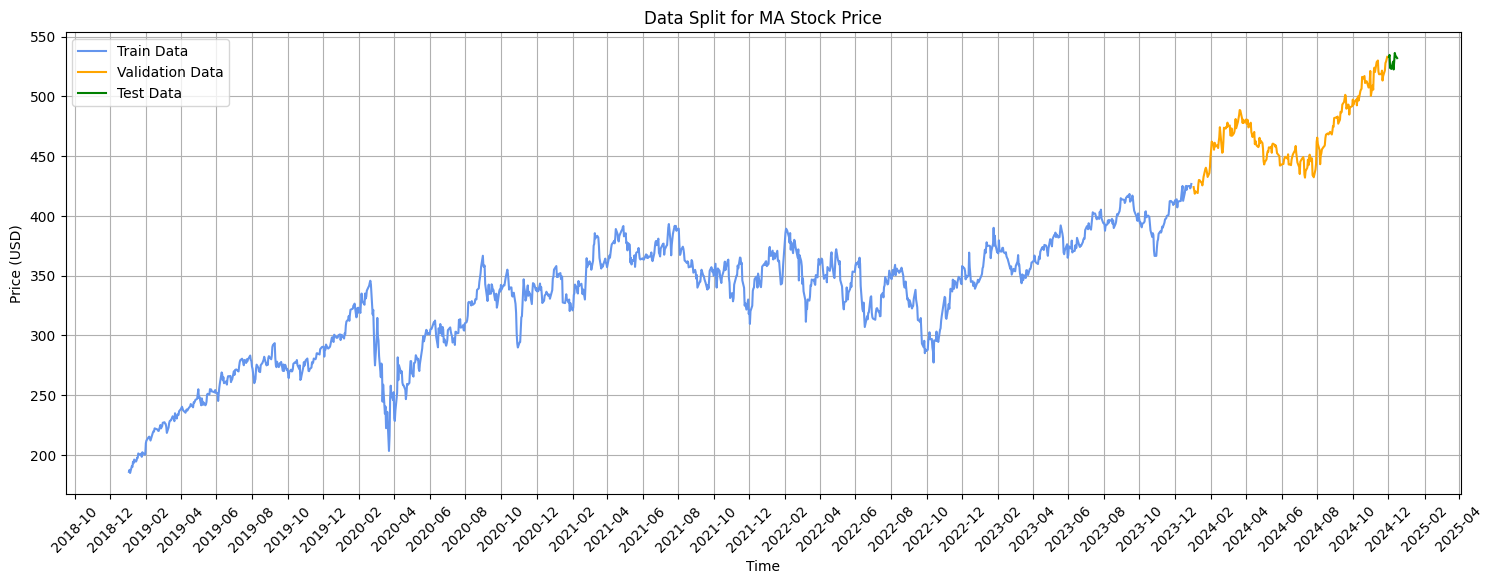

Saved processed data for MA.

Processing SMH...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


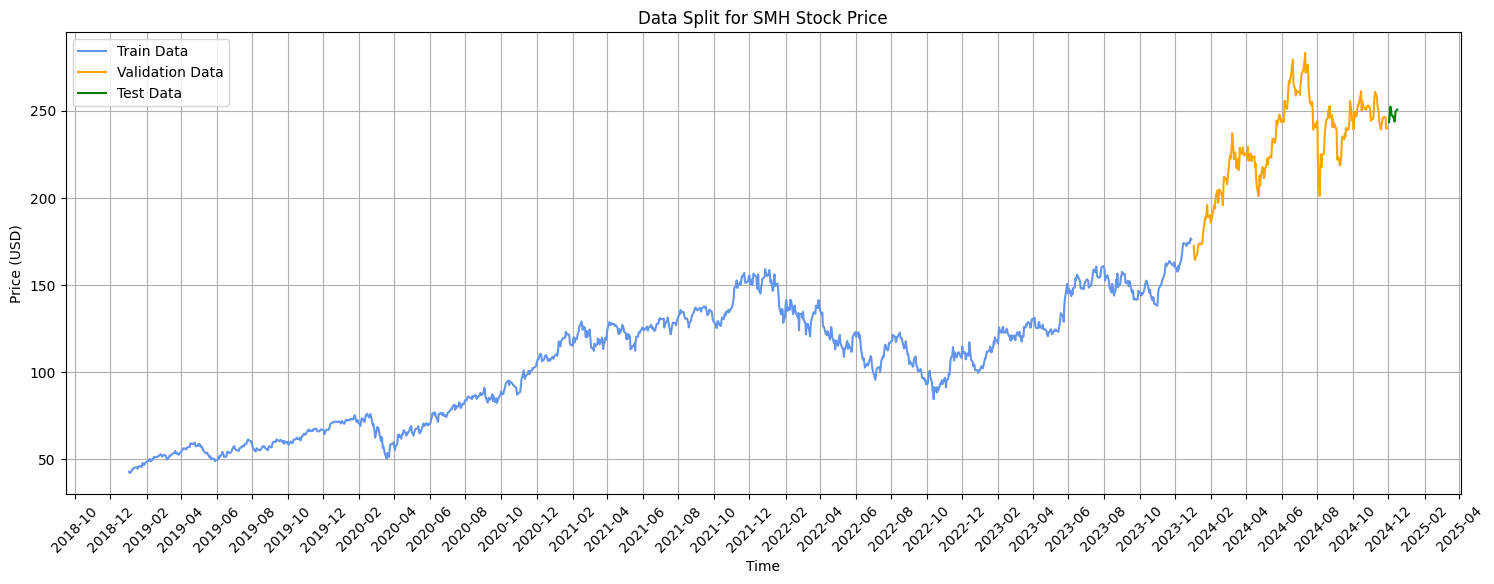

Saved processed data for SMH.

Processing SPY...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


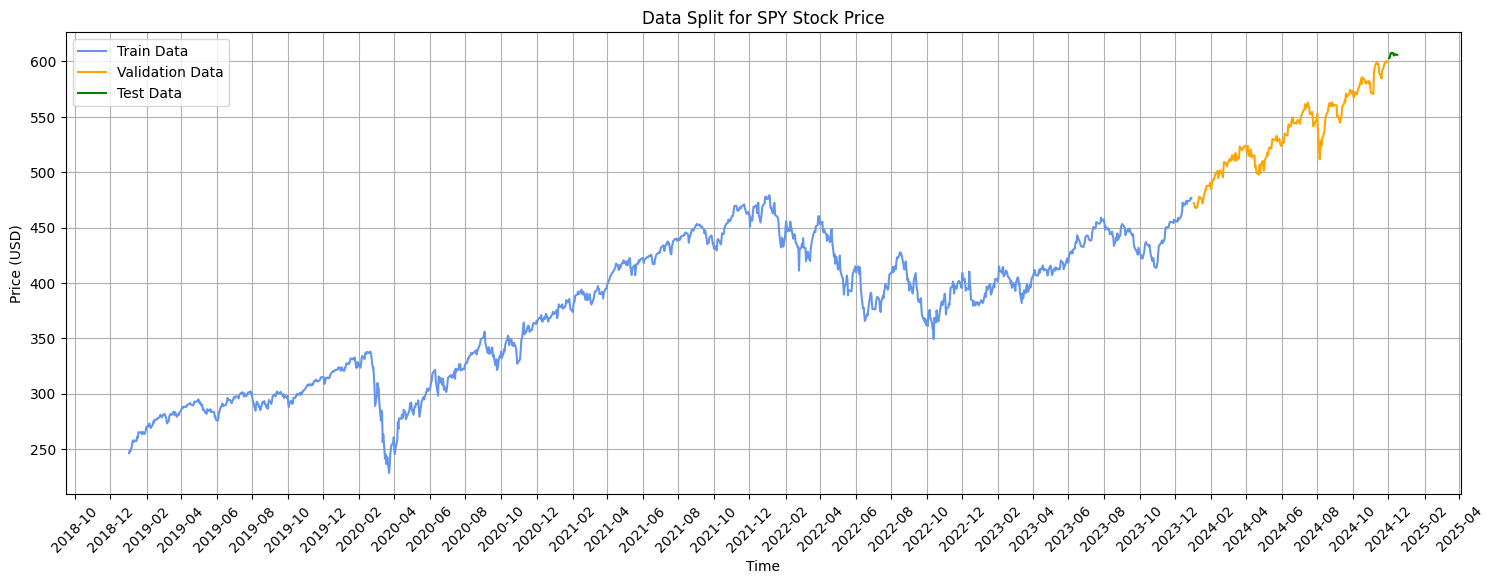

Saved processed data for SPY.

Processing QQQ...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


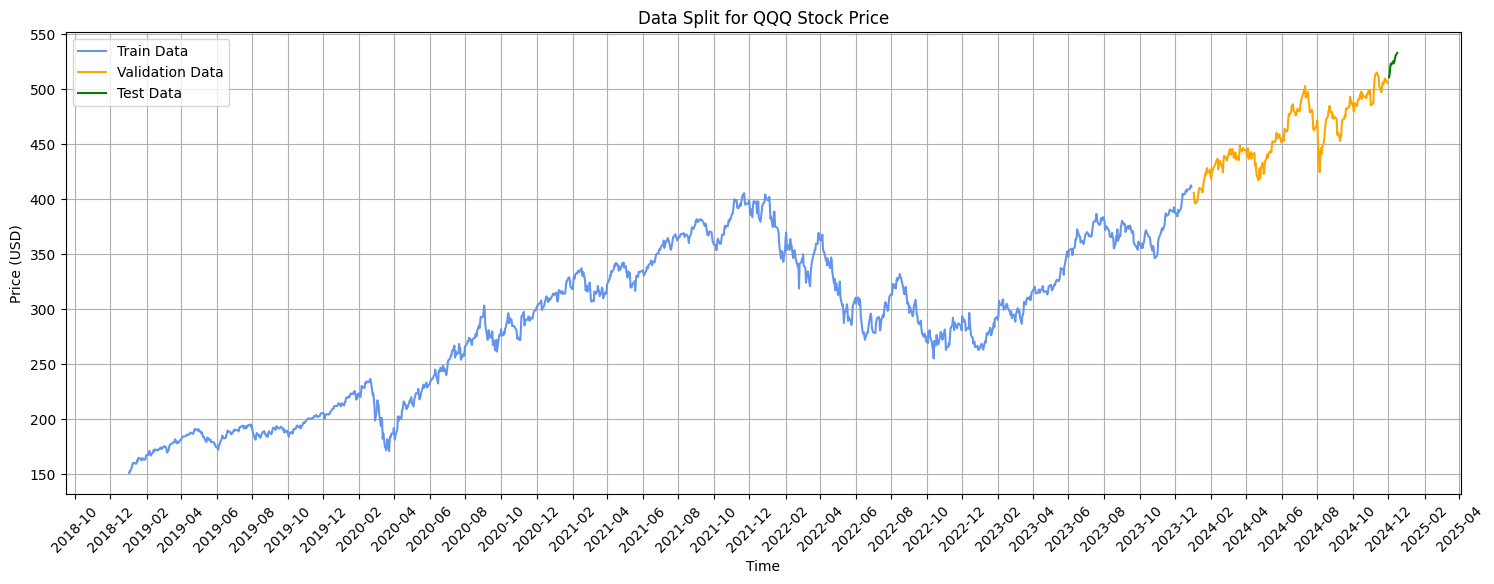

Saved processed data for QQQ.

Processing XLK...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


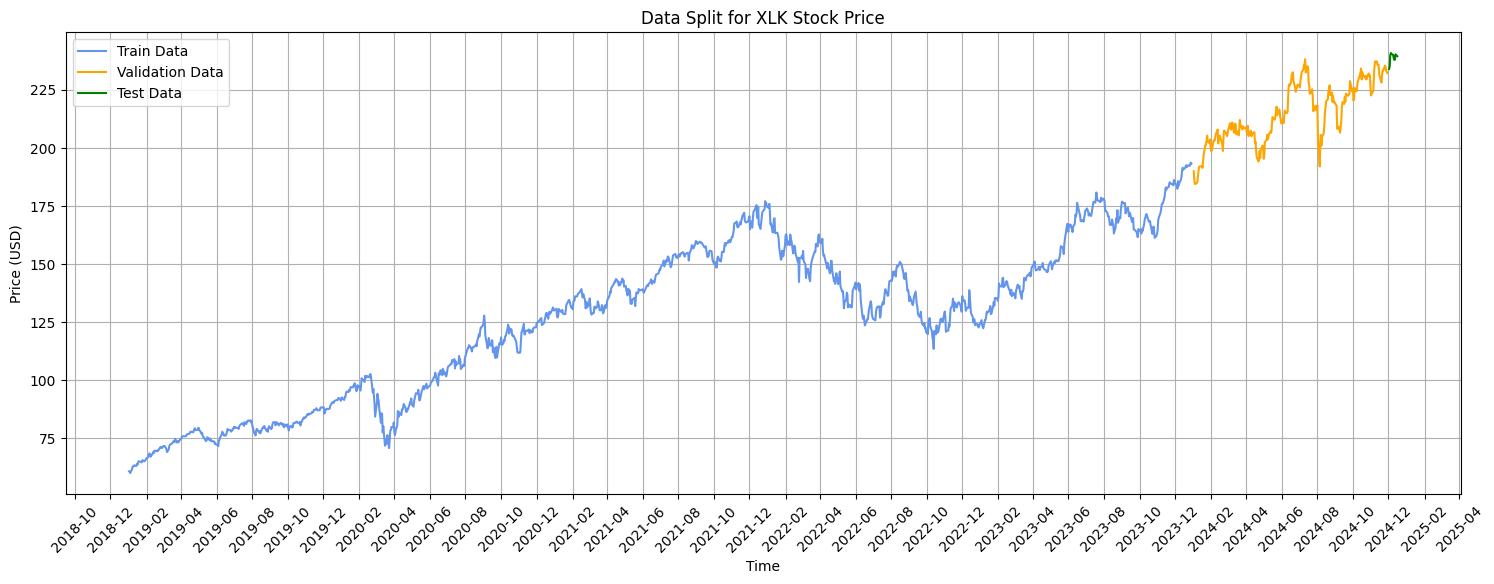

Saved processed data for XLK.

Processing XLC...
Training Set: (1258, 6)
Validation Set: (231, 6)
Testing Set: (11, 6)


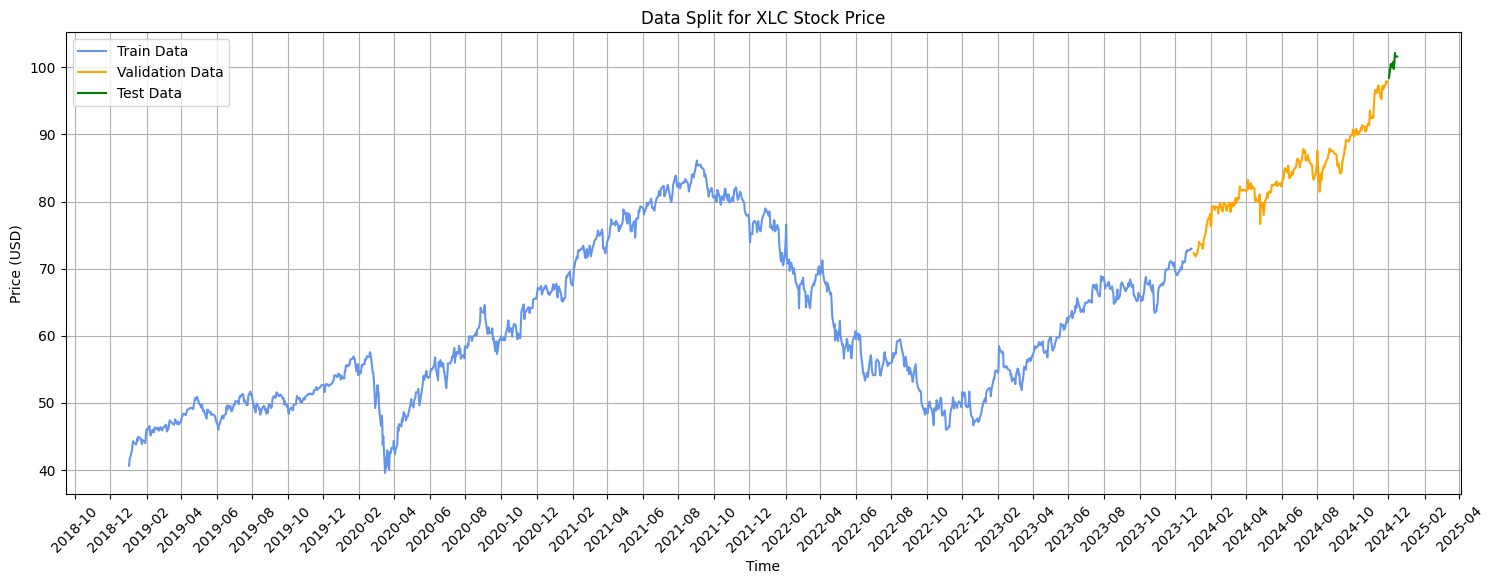

Saved processed data for XLC.

All stock data processing and splitting completed successfully.


In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import joblib

# List of stock tickers to process
# stock_list = ['AAPL', 'AMZN', 'GOOGL', 'NVDA', 'TSLA', 'AVGO']

# Directories for input, output, and scaler model
interim_data_dir = "..\\data\\interim\\"
processed_data_dir = "..\\data\\processed\\"
scaler_model_dir = "..\\models\\"

# Ensure directories exist
os.makedirs(processed_data_dir, exist_ok=True)
os.makedirs(scaler_model_dir, exist_ok=True)

# Function to process and scale stock data
def process_and_split_stock_data(ticker):
    try:
        # Dynamic file paths
        input_file = f"{interim_data_dir}{ticker.lower()}_stock_price_recent.csv"
        scaler_file = f"{scaler_model_dir}{ticker.lower()}_stock_price_scaler.gz"
        output_train = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_train.csv"
        output_validate = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_validate.csv"
        output_test = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_test.csv"

        print(f"Processing {ticker}...")

        # Load data file
        data = pd.read_csv(input_file)

        # Convert 'Date' column to datetime format
        data["Date"] = pd.to_datetime(data["Date"])

        # Define features and target
        features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

        # Define train, validation, and test date ranges
        train_end_date = pd.to_datetime("2023-12-31")
        validate_start_date = pd.to_datetime("2024-01-01")
        validate_end_date = pd.to_datetime("2024-11-30")
        test_start_date = pd.to_datetime("2024-12-01")
        test_end_date = pd.to_datetime("2024-12-17")

        # Split dataset
        data_train = data[data["Date"] <= train_end_date][features]
        data_train_dates = data[data["Date"] <= train_end_date]["Date"]
        data_validate = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)][features]
        data_validate_dates = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)]["Date"]
        data_test = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)][features]
        data_test_dates = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)]["Date"]

        # Display dataset shapes
        print(f"Training Set: {data_train.shape}")
        print(f"Validation Set: {data_validate.shape}")
        print(f"Testing Set: {data_test.shape}")

        # Plot Open stock prices for each data split
        plt.figure(figsize=(18, 6))
        plt.plot(data_train_dates, data_train["Open"], color="cornflowerblue")
        plt.plot(data_validate_dates, data_validate["Open"], color="orange")
        plt.plot(data_test_dates, data_test["Open"], color="green")
        plt.legend(["Train Data", "Validation Data", "Test Data"])
        plt.title(f"Data Split for {ticker} Stock Price")
        plt.xlabel("Time")
        plt.ylabel("Price (USD)")
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()

        # Initialize and fit scaler on training set
        scaler = MinMaxScaler(feature_range=(0, 1))
        data_train_scaled = scaler.fit_transform(data_train)
        data_validate_scaled = scaler.transform(data_validate)
        data_test_scaled = scaler.transform(data_test)

        # Save scaler
        joblib.dump(scaler, scaler_file)

        # Combine scaled data with dates
        data_train_scaled_final = pd.DataFrame(data_train_scaled, columns=features)
        data_train_scaled_final["Date"] = data_train_dates.values

        data_validate_scaled_final = pd.DataFrame(data_validate_scaled, columns=features)
        data_validate_scaled_final["Date"] = data_validate_dates.values

        data_test_scaled_final = pd.DataFrame(data_test_scaled, columns=features)
        data_test_scaled_final["Date"] = data_test_dates.values

        # Save processed datasets
        data_train_scaled_final.to_csv(output_train, index=False)
        data_validate_scaled_final.to_csv(output_validate, index=False)
        data_test_scaled_final.to_csv(output_test, index=False)

        print(f"Saved processed data for {ticker}.\n")

    except Exception as e:
        print(f"Error processing {ticker}: {str(e)}")

# Main function to loop through all tickers
def main():
    for ticker in stock_list:
        process_and_split_stock_data(ticker)

if __name__ == "__main__":
    main()
    print("All stock data processing and splitting completed successfully.")


# LSTM Time Series - Stock Price Prediction
## Part 3 - Model Training
In this notebook, we import the scaled dataset files, prepare them in a format suitable for LSTM modeling, and proceed to train the LSTM model.

> **INPUT**: Scaled dataset files for training, validation, and testing periods, as processed in the preceding phase. <br/>
> **OUTPUT**: Trained LSTM model and analysis of its performance.

In [ ]:
def main():
    for ticker in stock_list:
        try:
            print(f"Processing {ticker}...")

            # File paths
            train_file = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_train.csv"
            validate_file = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_validate.csv"
            test_file = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_test.csv"
            scaler_file = f"{models_dir}{ticker.lower()}_stock_price_scaler.gz"
            model_file = f"{models_dir}{ticker.lower()}_stock_price_lstm.model.keras"

            # Load processed data
            data_train_df = pd.read_csv(train_file)
            data_validate_df = pd.read_csv(validate_file)
            data_test_df = pd.read_csv(test_file)

            # Convert 'Date' column to datetime
            data_train_df["Date"] = pd.to_datetime(data_train_df["Date"])
            data_validate_df["Date"] = pd.to_datetime(data_validate_df["Date"])
            data_test_df["Date"] = pd.to_datetime(data_test_df["Date"])

            # Extract dates and features
            features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
            data_train = data_train_df[features].values
            data_validate = data_validate_df[features].values
            data_test = data_test_df[features].values

            # Combine all datasets
            data_all = np.concatenate([data_train, data_validate, data_test], axis=0)
            sequence_size = 60  # Define sequence size

            # Construct LSTM input/output
            X_train, y_train = construct_lstm_data(data_train, sequence_size, 0)
            train_size = len(data_train)
            validate_size = len(data_validate)

            X_validate, y_validate = construct_lstm_data(
                data_all[train_size-sequence_size:train_size+validate_size], sequence_size, 0
            )
            X_test, y_test = construct_lstm_data(data_all[-(len(data_test) + sequence_size):], sequence_size, 0)

            # Initialize the LSTM model
            model = Sequential()
            model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
            model.add(LSTM(units=100, return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(units=100, return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(units=100, return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(units=100))
            model.add(Dropout(0.2))
            model.add(Dense(1))

            # Compile the model
            model.compile(optimizer="adam", loss="mean_squared_error")

            # Checkpoint to save the best model
            checkpoint = ModelCheckpoint(model_file, monitor="val_loss", save_best_only=True, mode="min", verbose=0)

            # Train the model
            print("Training LSTM model...")
            with tf.device('/GPU:0'):
                history = model.fit(
                    X_train, y_train,
                    validation_data=(X_validate, y_validate),
                    epochs=200,
                    batch_size=64,
                    callbacks=[checkpoint],
                    verbose=1
                )

            # Plot LSTM Model Performance
            plt.figure(figsize=(18, 6))
            plt.plot(history.history["loss"], label="Training Loss")
            plt.plot(history.history["val_loss"], label="Validation Loss")
            plt.title(f"LSTM Model Performance for {ticker}")
            plt.xlabel("Epochs")
            plt.ylabel("Loss")
            plt.legend()
            plt.grid()
            plt.savefig(f"{output_dir}{ticker.lower()}_model_performance.png")
            plt.show()

            # Load the best model
            best_model = load_model(model_file)

            # Make future predictions
            scaler = joblib.load(scaler_file)
            future_predictions = predict_future(best_model, X_test[-1], days_to_predict=30, scaler=scaler)

            # Visualize predictions
            plt.figure(figsize=(10, 6))
            plt.plot(range(1, 31), future_predictions, label="Future Predictions", color="blue")
            plt.title(f"30-Day Stock Price Predictions for {ticker}")
            plt.xlabel("Days Ahead")
            plt.ylabel("Predicted Stock Price (USD)")
            plt.legend()
            plt.grid()
            plt.savefig(f"{output_dir}{ticker.lower()}_30_day_predictions.png")
            plt.show()

            print(f"Completed processing for {ticker}.\n")

        except Exception as e:
            print(f"Error processing {ticker}: {e}")

if __name__ == "__main__":
    main()
    print("All tickers processed successfully.")


In [ ]:
break

Processing AAPL...
Training LSTM model...
Epoch 1/200
19/19 [==============================] - 7s 132ms/step - loss: 0.0438 - val_loss: 0.0397
Epoch 2/200
19/19 [==============================] - 1s 60ms/step - loss: 0.0068 - val_loss: 0.0281
Epoch 3/200
19/19 [==============================] - 1s 49ms/step - loss: 0.0047 - val_loss: 0.0145
Epoch 4/200
19/19 [==============================] - 1s 51ms/step - loss: 0.0046 - val_loss: 0.0052
Epoch 5/200
19/19 [==============================] - 1s 53ms/step - loss: 0.0040 - val_loss: 0.0055
Epoch 6/200
19/19 [==============================] - 1s 52ms/step - loss: 0.0043 - val_loss: 0.0050
Epoch 7/200
19/19 [==============================] - 1s 49ms/step - loss: 0.0042 - val_loss: 0.0097
Epoch 8/200
19/19 [==============================] - 1s 54ms/step - loss: 0.0035 - val_loss: 0.0048
Epoch 9/200
19/19 [==============================] - 1s 56ms/step - loss: 0.0034 - val_loss: 0.0046
Epoch 10/200
19/19 [==============================] - 1s 

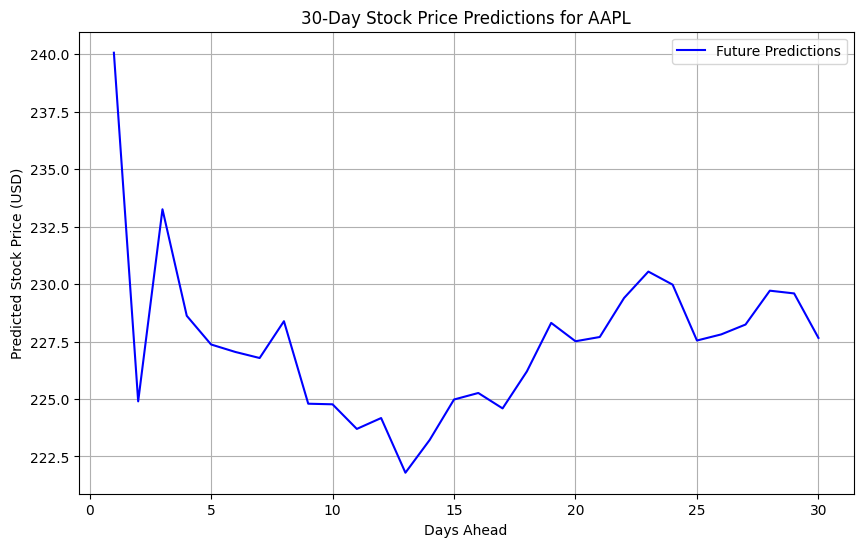

Completed processing for AAPL.

Processing TSLA...
Training LSTM model...
Epoch 1/200
19/19 [==============================] - 7s 119ms/step - loss: 0.0292 - val_loss: 0.0057
Epoch 2/200
19/19 [==============================] - 1s 59ms/step - loss: 0.0070 - val_loss: 0.0054
Epoch 3/200
19/19 [==============================] - 1s 50ms/step - loss: 0.0054 - val_loss: 0.0048
Epoch 4/200
19/19 [==============================] - 1s 49ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 5/200
19/19 [==============================] - 1s 50ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 6/200
19/19 [==============================] - 1s 50ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 7/200
19/19 [==============================] - 1s 50ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 8/200
19/19 [==============================] - 1s 52ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 9/200
19/19 [==============================] - 1s 47ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 10/200
19/19 [=====

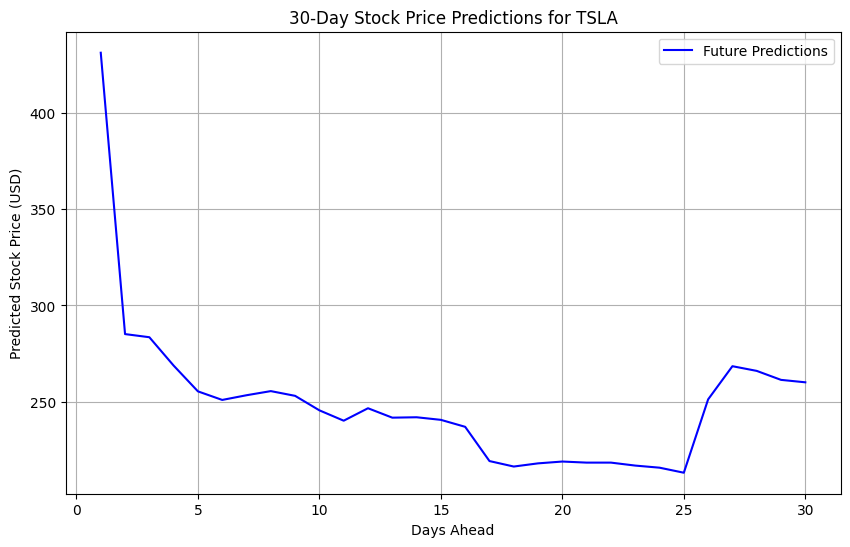

Completed processing for TSLA.

All tickers processed successfully.


In [46]:
%time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import joblib
import tensorflow as tf

# List of stock tickers to process
# stock_list = ['AAPL', 'TSLA']

# Directories for input, output, models, and scalers
processed_data_dir = "..//data//processed//"
models_dir = "..//models//"
output_dir = "..//data//results//"
os.makedirs(models_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# Function to construct LSTM input/output data
def construct_lstm_data(data, sequence_size, target_attr_idx):
    data_X, data_y = [], []
    for i in range(sequence_size, len(data)):
        data_X.append(data[i-sequence_size:i, :])
        data_y.append(data[i, target_attr_idx])
    return np.array(data_X), np.array(data_y)

# Function to predict future prices
def predict_future(model, last_sequence, days_to_predict, scaler=None):
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        current_sequence_batch = np.expand_dims(current_sequence, axis=0)
        next_prediction = model.predict(current_sequence_batch, verbose=0)[0, 0]
        future_predictions.append(next_prediction)

        # Slide the sequence forward
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1, 0] = next_prediction

    # Inverse transform predictions if scaler is provided
    # if scaler:
    #     future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()
    if scaler:
    # Pad future_predictions with dummy columns to match the scaler's expected shape
        padded_predictions = np.concatenate(
            (np.array(future_predictions).reshape(-1, 1), np.ones((len(future_predictions), 5))), axis=1
        )
        future_predictions = scaler.inverse_transform(padded_predictions)[:, 0]  # Take only the first column
    return future_predictions

# Main function to process each ticker
def main():
    for ticker in stock_list:
        try:
            print(f"Processing {ticker}...")

            # File paths
            train_file = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_train.csv"
            validate_file = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_validate.csv"
            test_file = f"{processed_data_dir}{ticker.lower()}_stock_price_processed_test.csv"
            scaler_file = f"{models_dir}{ticker.lower()}_stock_price_scaler.gz"
            model_file = f"{models_dir}{ticker.lower()}_stock_price_lstm.model.keras"

            # Load processed data
            data_train_df = pd.read_csv(train_file)
            data_validate_df = pd.read_csv(validate_file)
            data_test_df = pd.read_csv(test_file)

            # Convert 'Date' column to datetime
            data_train_df["Date"] = pd.to_datetime(data_train_df["Date"])
            data_validate_df["Date"] = pd.to_datetime(data_validate_df["Date"])
            data_test_df["Date"] = pd.to_datetime(data_test_df["Date"])

            # Extract dates and features
            features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
            data_train = data_train_df[features].values
            data_validate = data_validate_df[features].values
            data_test = data_test_df[features].values

            # Combine all datasets
            data_all = np.concatenate([data_train, data_validate, data_test], axis=0)
            sequence_size = 60  # Define sequence size

            # Construct LSTM input/output
            X_train, y_train = construct_lstm_data(data_train, sequence_size, 0)
            train_size = len(data_train)
            validate_size = len(data_validate)

            X_validate, y_validate = construct_lstm_data(
                data_all[train_size-sequence_size:train_size+validate_size], sequence_size, 0
            )
            X_test, y_test = construct_lstm_data(data_all[-(len(data_test) + sequence_size):], sequence_size, 0)

            # Initialize the LSTM model
            model = Sequential()
            model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
            model.add(LSTM(units=100, return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(units=100, return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(units=100, return_sequences=True))
            model.add(Dropout(0.2))
            model.add(LSTM(units=100))
            model.add(Dropout(0.2))
            model.add(Dense(1))

            # Compile the model
            model.compile(optimizer="adam", loss="mean_squared_error")

            # Checkpoint to save the best model
            checkpoint = ModelCheckpoint(model_file, monitor="val_loss", save_best_only=True, mode="min", verbose=0)

            # Train the model
            print("Training LSTM model...")
            with tf.device('/GPU:0'):
                history = model.fit(
                    X_train, y_train,
                    validation_data=(X_validate, y_validate),
                    epochs=200,
                    batch_size=64,
                    callbacks=[checkpoint],
                    verbose=1
                )

            # Load the best model
            best_model = load_model(model_file)

            # Make future predictions
            scaler = joblib.load(scaler_file)
            future_predictions = predict_future(best_model, X_test[-1], days_to_predict=30, scaler=scaler)

            # Visualize predictions
            plt.figure(figsize=(10, 6))
            plt.plot(range(1, 31), future_predictions, label="Future Predictions", color="blue")
            plt.title(f"30-Day Stock Price Predictions for {ticker}")
            plt.xlabel("Days Ahead")
            plt.ylabel("Predicted Stock Price (USD)")
            plt.legend()
            plt.grid()
            plt.savefig(f"{output_dir}{ticker.lower()}_30_day_predictions.png")
            plt.show()

            print(f"Completed processing for {ticker}.\n")

        except Exception as e:
            print(f"Error processing {ticker}: {e}")

if __name__ == "__main__":
    main()
    print("All tickers processed successfully.")


# BREAK

In [ ]:
break

# BY PARTS

# LSTM Time Series - Stock Price Prediction
## Part 1 - Data Explanatory Analysis

In [ ]:
import sqlite3
import pandas as pd

# connect to the database
# con = sqlite3.connect(r"Z:\Data\sp500_data\Scripts\sp500_market_data.db")
con = sqlite3.connect(r"C:\Users\Jonat\Documents\GitHub\lstm-stock-price-prediction\data\tickers.db")
# pd.read_sql_query("SELECT * FROM stock_data WHERE symbol = 'PANW'", con)
# con.close()
pd.read_sql_query("SELECT * FROM stock_data", con)

In [ ]:
import yfinance as yf

stock_data = yf.download("GOOGL", start='2010-01-01', end='2023-12-31')
stock_data.columns = stock_data.columns.droplevel(1)
stock_data

In [ ]:
# stock_data.to_csv('google_stock_price_full.csv')

# Define the directory where you want to save the file
output_dir = "..\\data\\raw\\"  # Replace with your desired directory path

# Ensure the directory exists, create it if it doesn't
os.makedirs(output_dir, exist_ok=True)

# Save the file to the specific directory
output_path = os.path.join(output_dir, "google_stock_price_full.csv")
stock_data.to_csv(output_path)

print(f"File saved to: {output_path}")

In [ ]:
# Prepare data file location and load the dataset
data_file_location = "..\\data\\raw\\"
data_file_name = "googl_stock_price"
data_file_ext = "csv"

# Load data file
data = pd.read_csv(data_file_location + data_file_name + "." + data_file_ext)

In [ ]:
# Check dataset shape
data.shape

In [ ]:
# Check dataset head
data.head()

In [ ]:
# Check data types
data.dtypes

### 3. INITIAL DATA CLEANING

As we notice, the Date column is currently in a String format which requires conversion to proper Datetime format.

In [ ]:
data = data.iloc[2:]
data

In [ ]:
# Convert Date column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Price"])
data["Date"] = pd.to_datetime(data["Date"])

# Convert numerical columns to their respective types
data[["Open", "High", "Low", "Close", "Adj Close"]] = data[["Open", "High", "Low", "Close", "Adj Close"]].astype(float)
data["Volume"] = data["Volume"].astype(int)

# Drop the 'Price' column
data = data.drop(columns=["Price"])

# Set "Date" as the index
# data = data.set_index("Date")
data

In [ ]:
# Check column format
data.dtypes

### 4. EXPLORE DATASET

In [ ]:
# Plot Open and Close price for the whole period
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(data["Date"], data["Open"])
plt.xlabel("Time")
plt.ylabel("Open Price (USD)")
plt.title("Google Open Stock Price")
plt.grid()

plt.subplot(1,2,2)
plt.plot(data["Date"], data["Close"])
plt.xlabel("Time")
plt.ylabel("Close Price (USD)")
plt.title("Google Close Stock Price")
plt.grid()

plt.suptitle("Google Stock Price Over Time")
plt.show()

The previous charts show an inconsistent behavior in the stock's performance over time, with a completely distinct trend during the past five years.

This means that the old historical data might not be relevant to the predictions, since it's most likely to represents a different period with outdated indicators that don't affect the current trend.

Accordingly, we will concentrate our analysis on the most recent five-year data, as it is expected to provide more accurate insights for predicting future trends.

In [ ]:
# Select stock price records for the last five years, starting from 2019
data_5years = data[data["Date"].dt.year >= 2019]

# Check filtered data shape
data_5years.shape

In [ ]:
# Plot Open stock price performance in the last five years
plt.figure(figsize=(18,6))
plt.plot(data_5years["Date"], data_5years["Open"])
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("Google Open Stock Price - Starting From 2019")
plt.grid()

The selected period seems to be more relevant for analysis, as it's more likely to drive the stock performance with the impact of other external factors.

In [ ]:
break

### 5. STORE FILTERED DATASET

In [ ]:
# Prepare data file location
data_file_location = "..//data//interim//"
data_file_name = "googl_stock_price_recent" 
data_file_ext = "csv"

# Store dataset
data_5years.to_csv(data_file_location + data_file_name + "." + data_file_ext, index=None)

# LSTM Time Series - Stock Price Prediction
## Part 2 - Data Preprocessing
This notebook focuses on processing the filtered dataset containing the historical prices of Google stocks over the past five years.

> **INPUT**: Filtered dataset containing Google's stock prices from the last five years, obtained from the previous phase. <br/>
> **OUTPUT**: Preprocessed and transformed data divided into training, validation, and testing subsets, stored in an interim location for the training phase.

### 1. INITIALIZATION

In [4]:
# Import necessary libraries and modules
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib
import matplotlib.dates as mdates

In [5]:
# Set output width
pd.set_option("display.width", 120)

### 2. LOADING DATASET

In [6]:
# Prepare data file location and name
data_file_location = "..//data//interim//"
data_file_name = "google_stock_price_recent"
data_file_ext = "csv"

# Load data file
data = pd.read_csv(data_file_location + data_file_name + "." + data_file_ext)

In [7]:
# Check loaded data shape
data.shape

(1323, 7)

In [8]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,50.828499,52.616001,50.785500,52.292500,52.292500,30652000
1,2019-01-03,52.049999,52.848999,50.703499,50.803001,50.803001,36822000
2,2019-01-04,51.629501,53.542000,51.370899,53.535500,53.535500,41878000
3,2019-01-07,53.575001,53.700001,52.737999,53.419498,53.419498,39638000
4,2019-01-08,53.805500,54.228001,53.026501,53.813999,53.813999,35298000


In [9]:
# Check loaded data head
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,50.828499,52.616001,50.785500,52.292500,52.292500,30652000
1,2019-01-03,52.049999,52.848999,50.703499,50.803001,50.803001,36822000
2,2019-01-04,51.629501,53.542000,51.370899,53.535500,53.535500,41878000
3,2019-01-07,53.575001,53.700001,52.737999,53.419498,53.419498,39638000
4,2019-01-08,53.805500,54.228001,53.026501,53.813999,53.813999,35298000


In [10]:
# Check columns types
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### 3. DATA PREPROCESSING

#### Validate Data Types

In [11]:
# Convert date column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Check column types
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

#### Select Independent Features

The objective of this analysis is to implement a multi-variant prediction, taking into account possible impact of several independent features such as the Open price, Close price and Volume on future stock price performance.

Therefore, in this analysis, we will incorporate all the available variables: 
- Opening price
- Highest price
- Lowest price
- Closing price
- Adjusted closing price
- Trading volume

These features will be utilized to forecast the future opening price.

In [12]:
# Define selected features and target attribute
features = ["Open", "High", "Low",	"Close", "Adj Close", "Volume"]
target = "Open"

#### Create Train, Validation, and Test Datasets

To monitor and assess the performance of our model, we will partition the recent stock price dataset into three segments: training, validation, and testing sets.

The division will be structured as follows:
- **Training dataset:** covering the period from the start of 2019 till June, 2023.
- **Validation dataset:** representing the stock prices from July, 2023 till the end of 2023.
- **Testing dataset:** representing the stock prices for the first two months of 2024.

In [13]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1318,2024-03-28,152.000000,152.669998,151.330002,152.259995,152.259995,21105600
1319,2024-04-01,151.830002,157.000000,151.649994,156.500000,156.500000,24469800
1320,2024-04-02,154.750000,155.990005,153.460007,155.869995,155.869995,17598100
1321,2024-04-03,154.919998,156.550003,154.132004,156.369995,156.369995,17218400
1322,2024-04-04,155.080002,156.179993,151.880005,151.940002,151.940002,24114800


In [14]:
# Define start and end time for each period
train_end_date = pd.to_datetime("2023-06-30")
validate_start_date = pd.to_datetime("2023-07-01")
validate_end_date = pd.to_datetime("2023-12-31")
test_start_date = pd.to_datetime("2024-01-01")
test_end_date = pd.to_datetime("2024-02-29")

# Split dataset into training, validation, and testing
data_train = data[data["Date"] <= train_end_date][features]
data_train_dates = data[data["Date"] <= train_end_date]["Date"]
data_validate = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)][features]
data_validate_dates = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)]["Date"]
data_test = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)][features]
data_test_dates = data[(data["Date"] >= test_start_date) & (data["Date"] <= test_end_date)]["Date"]

In [15]:
# Display the shape of each dataset
print(f"Training Set: {data_train.shape}")
print(f"Validation Set: {data_validate.shape}")
print(f"Testing Set: {data_test.shape}")

Training Set: (1132, 6)
Validation Set: (126, 6)
Testing Set: (41, 6)


In [16]:
# Display a summary of each dataset
print("Training Dataset:")
print(data_train.head())
print("Validation Dataset:")
print(data_validate.head())
print("Testing Dataset:")
print(data_test.head())

Training Dataset:
        Open       High        Low      Close  Adj Close    Volume
0  50.828499  52.616001  50.785500  52.292500  52.292500  30652000
1  52.049999  52.848999  50.703499  50.803001  50.803001  36822000
2  51.629501  53.542000  51.370899  53.535500  53.535500  41878000
3  53.575001  53.700001  52.737999  53.419498  53.419498  39638000
4  53.805500  54.228001  53.026501  53.813999  53.813999  35298000
Validation Dataset:
            Open        High         Low       Close   Adj Close    Volume
1132  120.320000  121.019997  119.705002  120.559998  120.559998  13888300
1133  120.059998  123.370003  120.059998  122.629997  122.629997  17830300
1134  120.639999  121.150002  119.250000  120.930000  120.930000  17732500
1135  120.889999  121.750000  120.089996  120.139999  120.139999  20982400
1136  119.070000  119.070000  116.639999  116.870003  116.870003  32960100
Testing Dataset:
            Open        High         Low       Close   Adj Close    Volume
1258  139.600006  

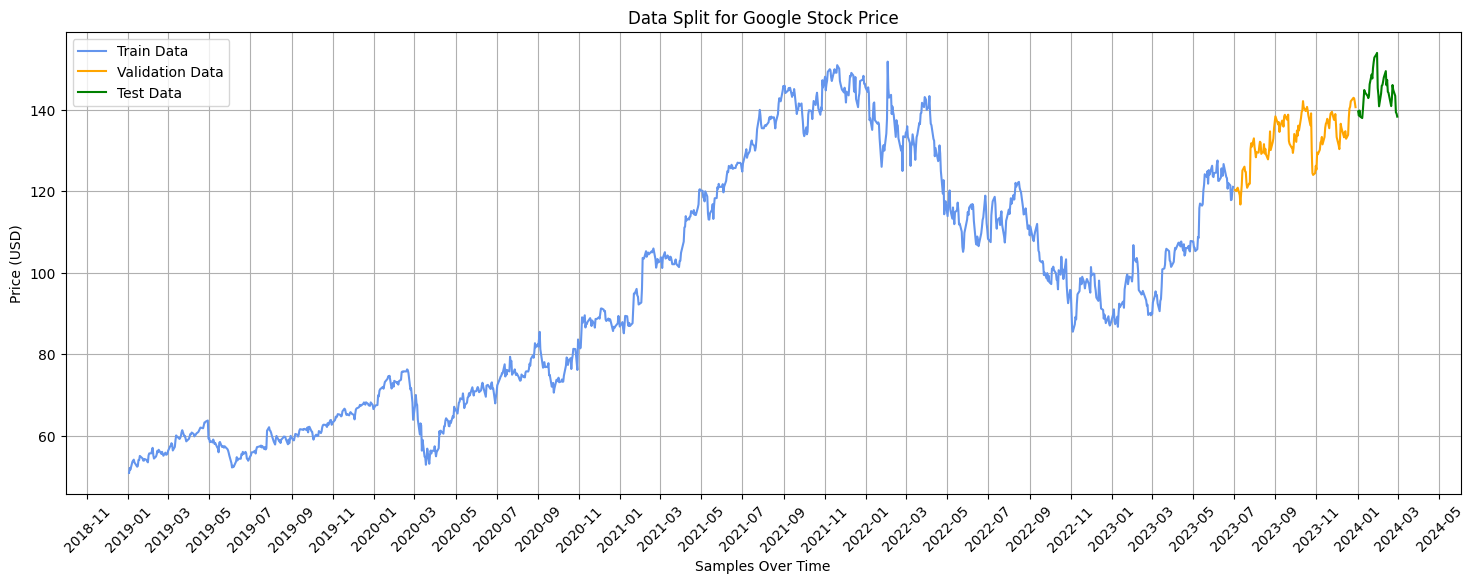

In [17]:
# Plot stock prices for each data split
plt.figure(figsize=(18,6))
plt.plot(data_train_dates, data_train["Open"], color="cornflowerblue")
plt.plot(data_validate_dates, data_validate["Open"], color="orange")
plt.plot(data_test_dates, data_test["Open"], color="green")
plt.legend(["Train Data", "Validation Data", "Test Data"])
plt.title("Data Split for Google Stock Price")
plt.xlabel("Samples Over Time")
plt.ylabel("Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.grid()

#### Data Scaling

In [18]:
# Check the distribution of input features
data[features].describe()

,Open,High,Low,Close,Adj Close,Volume
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03
mean,100.882880,102.042442,99.853834,100.974635,100.974635,2.882756e+07
std,31.078299,31.360869,30.780336,31.059813,31.059813,1.268332e+07
min,50.828499,52.374500,50.676800,50.803001,50.803001,6.936000e+06
25%,71.211247,71.905250,70.356251,70.992001,70.992001,2.076335e+07
50%,102.825996,103.927498,101.500000,102.751503,102.751503,2.575600e+07
75%,130.778503,132.021675,129.389999,130.440002,130.440002,3.287305e+07
max,155.080002,157.000000,154.132004,156.500000,156.500000,1.241400e+08


Looking at these details, it's noticeable and anticipated that all price values exhibit similar distributions given they log the price fluctuation on daily basis.

Conversely, the trading volume presents a distinct distribution that differs significantly.

Accordingly, input features need to be transformed into a unified scale and since the distribution doesn't indicate any outliers, we will use the [0,1] range to normalize all features.

To prevent data leakage, we will fit the scaler solely to the training data. Subsequently, we will use this fitted scaler to transform the training, validation, and testing datasets.

In [19]:
# Initialize scaler with range [0,1]
sc = MinMaxScaler(feature_range=(0,1))

# Fit and transform scaler to training set
data_train_scaled = sc.fit_transform(data_train)

# Transform validating and testing datasets
data_validate_scaled = sc.transform(data_validate)
data_test_scaled = sc.transform(data_test)

The scaler employed here will also be utilized in subsequent phases to revert the scaled data back to its original distribution. Therefore, it is essential to save this scaler to a local folder for future use.

In [20]:
# Prepare scaler model name and location
scaler_model_location = "..//models//"
scaler_model_name = "google_stock_price_scaler"
scaler_model_ext = "gz"

# Store scaler model
joblib.dump(sc, scaler_model_location + scaler_model_name + "." + scaler_model_ext)

['..//models//google_stock_price_scaler.gz']

### 4. STORING PROCESSED DATASETS

The training, validation, and testing datasets have been processed and are prepared for training the LSTM model in the next phase.

Prior to saving these datasets, it is necessary to reassemble the dates corresponding to each dataset. This will facilitate later evaluation of the model's performance.

In [21]:
# Combine dates with each corresponding dataset
data_train_scaled_final = pd.DataFrame(data_train_scaled, columns=features, index=None)
data_train_scaled_final["Date"] = data_train_dates.values

data_validate_scaled_final = pd.DataFrame(data_validate_scaled, columns=features, index=None)
data_validate_scaled_final["Date"] = data_validate_dates.values

data_test_scaled_final = pd.DataFrame(data_test_scaled, columns=features, index=None)
data_test_scaled_final["Date"] = data_test_dates.values

In [22]:
# Prepare datasets files and location
data_file_location = "..//data//processed//"
data_file_name_train = "google_stock_price_processed_train"
data_file_name_validate = "google_stock_price_processed_validate"
data_file_name_test = "google_stock_price_processed_test"
data_file_ext = "csv"

# Store datasets
data_train_scaled_final.to_csv(data_file_location + data_file_name_train + "." + data_file_ext, index=None)
data_validate_scaled_final.to_csv(data_file_location + data_file_name_validate + "." + data_file_ext, index=None)
data_test_scaled_final.to_csv(data_file_location + data_file_name_test + "." + data_file_ext, index=None)

In [ ]:
break

# BREAK

In [ ]:
break

In [23]:
def predict_future(model, last_sequence, days_to_predict, scaler=sc):
    """
    Predict stock prices for a specified number of future days and transform to actual prices if a scaler is provided.

    Parameters:
    - model: Trained LSTM model.
    - last_sequence: The most recent sequence of data (shape: [sequence_size, n_features]).
    - days_to_predict: Number of future days to predict.
    - scaler: Scaler object used for data preprocessing (e.g., MinMaxScaler).

    Returns:
    - future_predictions: Array of predicted values in the original scale.
    """
    future_predictions = []
    current_sequence = last_sequence.copy()  # Start with the last known sequence

    for _ in range(days_to_predict):
        # Add batch dimension (1, sequence_size, n_features) for prediction
        current_sequence_batch = np.expand_dims(current_sequence, axis=0)
        next_prediction = model.predict(current_sequence_batch)[0, 0]  # Predict the next step

        # Append the predicted value
        future_predictions.append(next_prediction)

        # Update the current sequence by sliding it forward
        next_sequence = np.roll(current_sequence, -1, axis=0)
        next_sequence[-1, 0] = next_prediction  # Update the last value with the prediction
        current_sequence = next_sequence

    # Apply inverse transformation if a scaler is provided
    if scaler:
        future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

    return future_predictions

In [25]:
# Example usage
days_to_predict = 30

# Replace `None` with your scaler (e.g., MinMaxScaler or StandardScaler used during preprocessing)
future_predictions = predict_future(
    model=regressor, 
    last_sequence=X_test[-1], 
    days_to_predict=days_to_predict, 
    scaler=sc  # Pass the scaler used during training
)

# Visualize the predictions with actual prices
plt.figure(figsize=(10, 6))
plt.plot(range(1, days_to_predict + 1), future_predictions, label="Future Predictions (Actual Prices)", color="blue")
plt.title("30-Day Stock Price Predictions (Actual Prices)")
plt.xlabel("Days Ahead")
plt.ylabel("Predicted Stock Price (USD)")
plt.legend()
plt.grid()
plt.show()

NameError: name 'regressor' is not defined

In [ ]:
break

# BREAK

In [ ]:
break

# LSTM Time Series - Stock Price Prediction
## Part 3 - Model Training
In this notebook, we import the scaled dataset files, prepare them in a format suitable for LSTM modeling, and proceed to train the LSTM model.

> **INPUT**: Scaled dataset files for training, validation, and testing periods, as processed in the preceding phase. <br/>
> **OUTPUT**: Trained LSTM model and analysis of its performance.

### 1. INITIALIZATION

In [43]:
# Import necessary libraries and modules
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import joblib

from tensorflow.keras.models import Sequential
from tensorflow.python.client import device_lib
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from keras.callbacks import ModelCheckpoint
from keras.models import load_model



print("tf version: ", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("tf is built with CUDA: ", tf.test.is_built_with_cuda())
print(f"tf is built with GPU Support: {tf.test.is_built_with_gpu_support()}\n\n")
print(device_lib.list_local_devices())

tf version:  2.10.0
Num GPUs Available:  2
tf is built with CUDA:  True
tf is built with GPU Support: , True


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17787035391130449102
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9859760128
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3425967915003167179
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:09:00.0, compute capability: 8.9"
xla_global_id: 416903419
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 6948913152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11635832944692726476
physical_device_desc: "device: 1, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:03:00.0, compute capability: 6.1"
xla_global_id: 2144165316
]


### 2. LOADING DATASETS

In [6]:
# Prepare data file location and name
data_file_location = "..//data//processed//"
data_file_name_train = "google_stock_price_processed_train"
data_file_name_validate = "google_stock_price_processed_validate"
data_file_name_test = "google_stock_price_processed_test"
data_file_ext = "csv"

# Load data files
data_train_df = pd.read_csv(data_file_location + data_file_name_train + "." + data_file_ext)
data_validate_df = pd.read_csv(data_file_location + data_file_name_validate + "." + data_file_ext)
data_test_df = pd.read_csv(data_file_location + data_file_name_test + "." + data_file_ext)

In [7]:
data_test_df

,Open,High,Low,Close,Adj Close,Volume,Date
0,0.878621,0.884834,0.877559,0.888405,0.888405,0.112077,2024-01-02
1,0.868724,0.889597,0.884513,0.896413,0.896413,0.102712,2024-01-03
2,0.881096,0.885034,0.880280,0.873191,0.873191,0.096561,2024-01-04
3,0.866269,0.866734,0.868588,0.866685,0.866685,0.072499,2024-01-05
4,0.862785,0.885084,0.878970,0.898114,0.898114,0.091373,2024-01-08
5,0.883174,0.906744,0.898222,0.918433,0.918433,0.107878,2024-01-09
6,0.907522,0.924041,0.925134,0.930845,0.930845,0.082812,2024-01-10
7,0.931029,0.945450,0.922665,0.929544,0.929544,0.089887,2024-01-11
8,0.925536,0.926197,0.934206,0.935249,0.935249,0.060230,2024-01-12
9,0.916529,0.937228,0.931142,0.933648,0.933648,0.104629,2024-01-16


In [8]:
# Check loaded datasets shape
print(f"Training Dataset Shape: {data_train_df.shape}")
print(f"Validation Dataset Shape: {data_validate_df.shape}")
print(f"Testing Dataset Shape: {data_test_df.shape}")

Training Dataset Shape: (1132, 7)
Validation Dataset Shape: (126, 7)
Testing Dataset Shape: (41, 7)


In [9]:
# Display a summary of each dataset
print("Training Dataset:")
print(data_train_df.head())
print("Validation Dataset:")
print(data_validate_df.head())
print("Testing Dataset:")
print(data_test_df.head())

Training Dataset:
       Open      High       Low     Close  Adj Close    Volume        Date
0  0.000000  0.002422  0.001096  0.014909   0.014909  0.202348  2019-01-02
1  0.012090  0.004758  0.000269  0.000000   0.000000  0.254991  2019-01-03
2  0.007928  0.011707  0.006996  0.027351   0.027351  0.298130  2019-01-04
3  0.027184  0.013291  0.020776  0.026190   0.026190  0.279018  2019-01-07
4  0.029465  0.018586  0.023684  0.030138   0.030138  0.241988  2019-01-08
Validation Dataset:
       Open      High       Low     Close  Adj Close    Volume        Date
0  0.687796  0.688344  0.695774  0.698226   0.698226  0.059318  2023-07-03
1  0.685223  0.711909  0.699352  0.718946   0.718946  0.092952  2023-07-05
2  0.690964  0.689648  0.691188  0.701930   0.701930  0.092117  2023-07-06
3  0.693438  0.695665  0.699654  0.694022   0.694022  0.119846  2023-07-07
4  0.675424  0.668791  0.664880  0.661292   0.661292  0.222041  2023-07-10
Testing Dataset:
       Open      High       Low     Close  Ad

### 3. DATA PREPROCESSING

The dataset has already undergone the primary preprocessing and transformation in the pervious phase. This section is only to display the data and extract features and dates.

In [10]:
# Convert Date column to a valid Datetime format
data_train_df["Date"] = pd.to_datetime(data_train_df["Date"])
data_validate_df["Date"] = pd.to_datetime(data_validate_df["Date"])
data_test_df["Date"] = pd.to_datetime(data_test_df["Date"])

In [11]:
# Extract dates from each dataset
data_train_dates = data_train_df["Date"]
data_validate_dates = data_validate_df["Date"]
data_test_dates = data_test_df["Date"]

In [12]:
# Extract features
features = ["Open", "High", "Low",	"Close", "Adj Close", "Volume"]
data_train_scaled = data_train_df[features].values
data_validate_scaled = data_validate_df[features].values
data_test_scaled = data_test_df[features].values

### 4. CONSTRUCTING DATA STRUCTURE

Given that we are addressing a time series problem involving multiple predictors, our task involves constructing and reshaping the input data to suit the LSTM model.

This entails setting a sliding time window (sequence size) that determines the number of past observations used to predict the subsequent value.

In this experiment, we employ a sequence of previous samples (financial days) of all variables to forecast the opening price on the following day.

In [13]:
# Define a method to construct the input data X and Y
def construct_lstm_data(data, sequence_size, target_attr_idx):
    """
    Construct input data (X) and target data (y) for LSTM model from a pandas DataFrame.

    Parameters:
    -----------
    data : numpy.ndarray
        Input data array of shape (n_samples, n_features).
    
    sequence_size : int
        Number of previous time steps to use as input features for predicting the next time step.
    
    target_attr_idx : int
        Index of column in `data` DataFrame that corresponds to target attribute that LSTM model will predict.

    Returns:
    --------
    data_X : numpy.ndarray
        Array of LSTM input sequences of shape (n_samples - sequence_size, sequence_size, n_features).

    data_y : numpy.ndarray
        Corresponding target values for each input sequence of shape (n_samples - sequence_size,).
    """
    
    # Initialize constructed data variables
    data_X = []
    data_y = []
    
    # Iterate over the dataset
    for i in range(sequence_size, len(data)):
        data_X.append(data[i-sequence_size:i,0:data.shape[1]])
        data_y.append(data[i,target_attr_idx])
        
    # Return constructed variables
    return np.array(data_X), np.array(data_y)

The construction function is currently available for constructing subsets for training, validation, and testing date that is aligned with the LSTM model input.

In [14]:
# Define the sequence size
sequence_size = 60

# Construct training data
X_train, y_train = construct_lstm_data(data_train_scaled, sequence_size, 0)

Because creating input data requires observations from previous samples, constructing subsets for the validation and testing periods suggests we append data from previous periods.

For instance, to predict the initial stock price in the validation period, we must combine recent actual stock prices (sequence) from the training period. This step is crucial for providing the LSTM model with the expected sequence.

Same principle applies to stock performance during the testing phase but in this case (and depending on the sequence size), we may need to combine samples from both validation and testing subsets.

To facilitate this step, we combine the whole scaled dataset together and then select corresponding chunks before constructing the input data sets.

In [15]:
# Combine scaled datasets all together
data_all_scaled = np.concatenate([data_train_scaled, data_validate_scaled, data_test_scaled], axis=0)

# Calculate data size
train_size = len(data_train_scaled)
validate_size = len(data_validate_scaled)
test_size = len(data_test_scaled)

# Construct validation dataset
X_validate, y_validate = construct_lstm_data(data_all_scaled[train_size-sequence_size:train_size+validate_size,:], sequence_size, 0)

# Construct testing dataset
X_test, y_test = construct_lstm_data(data_all_scaled[-(test_size+sequence_size):,:], sequence_size, 0)

In [16]:
# Check original data and data splits shapes
print(f"Full Scaled Data: {data_all_scaled.shape}")
print(f"\n Data Train Scaled: {data_train_scaled.shape}")
print(f"> Data Train X: {X_train.shape}")
print(f"> Data Train y: {y_train.shape}")

print(f"\n Data Validate Scaled: {data_validate_scaled.shape}")
print(f"> Data Validate X: {X_validate.shape}")
print(f"> Data Validate y: {y_validate.shape}")

print(f"\n Data Test Scaled: {data_test_scaled.shape}")
print(f"> Data Test X: {X_test.shape}")
print(f"> Data Test y: {y_test.shape}")

Full Scaled Data: (1299, 6)

 Data Train Scaled: (1132, 6)
> Data Train X: (1072, 60, 6)
> Data Train y: (1072,)

 Data Validate Scaled: (126, 6)
> Data Validate X: (126, 60, 6)
> Data Validate y: (126,)

 Data Test Scaled: (41, 6)
> Data Test X: (41, 60, 6)
> Data Test y: (41,)


### 5. TRAINING LSTM MODEL

#### Building LSTM Model

In [17]:
# Initializing the model
regressor = Sequential()

In [18]:
# Add input layer
regressor.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

In [19]:
# Add first LSTM layer and dropout regularization layer
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

In [20]:
# Add second LSTM layer and dropout regularization layer
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

In [21]:
# Add third LSTM layer and dropout regularization layer
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

In [22]:
# Add forth LSTM layer and dropout regularization layer
regressor.add(LSTM(units = 100))
regressor.add(Dropout(rate = 0.2))

In [23]:
# Add last dense layer/output layer
regressor.add(Dense(units = 1))

In [24]:
# Compiling the model
regressor.compile(optimizer = "adam", loss="mean_squared_error")

#### Training Model

In [25]:
# Create a checkpoint to monitor the validation loss and save the model with the best performance.
model_location = "..//models//"
model_name = "google_stock_price_lstm.model.keras"
best_model_checkpoint_callback = ModelCheckpoint(
    model_location + model_name, 
    monitor="val_loss", 
    save_best_only=True, 
    mode="min", 
    verbose=0)


In [39]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17821155554198747157
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9859760128
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5372366162889205325
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:09:00.0, compute capability: 8.9"
xla_global_id: 416903419
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 6948913152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18218292176717001962
physical_device_desc: "device: 1, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:03:00.0, compute capability: 6.1"
xla_global_id: 2144165316
]


In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3231469075454409291
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9859760128
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17017251705791356932
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:09:00.0, compute capability: 8.9"
xla_global_id: 416903419
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 6948913152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3979739086872713238
physical_device_desc: "device: 1, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:03:00.0, compute capability: 6.1"
xla_global_id: 2144165316
]


In [3]:
print(tf.__version__)

2.10.0


In [40]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [22]:
tf.test.is_built_with_cuda()

True

In [23]:
print(tf.test.is_built_with_gpu_support())

True


In [29]:
with tf.device('/GPU:0'):  # '/GPU:0' corresponds to the first GPU    # RTX 4070 as per above shown, diff from pytorch
    history = regressor.fit(
        x=X_train,
        y=y_train,
        validation_data=(X_validate, y_validate),
        epochs=200,
        batch_size=64,
        callbacks=[best_model_checkpoint_callback]
    )

Epoch 1/200
17/17 [==============================] - 1s 52ms/step - loss: 0.0011 - val_loss: 3.6299e-04
Epoch 2/200
17/17 [==============================] - 1s 53ms/step - loss: 9.8964e-04 - val_loss: 3.5916e-04
Epoch 3/200
17/17 [==============================] - 1s 48ms/step - loss: 9.6059e-04 - val_loss: 3.4533e-04
Epoch 4/200
17/17 [==============================] - 1s 45ms/step - loss: 0.0010 - val_loss: 3.4635e-04
Epoch 5/200
17/17 [==============================] - 1s 43ms/step - loss: 9.6352e-04 - val_loss: 4.1638e-04
Epoch 6/200
17/17 [==============================] - 1s 43ms/step - loss: 9.3075e-04 - val_loss: 3.8853e-04
Epoch 7/200
17/17 [==============================] - 1s 43ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 8/200
17/17 [==============================] - 1s 44ms/step - loss: 0.0011 - val_loss: 3.5763e-04
Epoch 9/200
17/17 [==============================] - 1s 43ms/step - loss: 0.0010 - val_loss: 3.8853e-04
Epoch 10/200
17/17 [==============================] 

In [27]:
with tf.device('/GPU:1'):  # '/GPU:0' corresponds to the first GPU
    history = regressor.fit(
        x=X_train,
        y=y_train,
        validation_data=(X_validate, y_validate),
        epochs=20,
        batch_size=64,
        callbacks=[best_model_checkpoint_callback]
    )

Epoch 1/20
17/17 [==============================] - 4s 89ms/step - loss: 0.0012 - val_loss: 6.4904e-04
Epoch 2/20
17/17 [==============================] - 1s 54ms/step - loss: 0.0012 - val_loss: 6.7609e-04
Epoch 3/20
17/17 [==============================] - 1s 49ms/step - loss: 0.0012 - val_loss: 7.6283e-04
Epoch 4/20
17/17 [==============================] - 1s 56ms/step - loss: 0.0010 - val_loss: 4.2170e-04
Epoch 5/20
17/17 [==============================] - 1s 47ms/step - loss: 9.1068e-04 - val_loss: 4.7098e-04
Epoch 6/20
17/17 [==============================] - 1s 50ms/step - loss: 0.0011 - val_loss: 4.1086e-04
Epoch 7/20
17/17 [==============================] - 1s 49ms/step - loss: 9.2875e-04 - val_loss: 7.8390e-04
Epoch 8/20
17/17 [==============================] - 1s 56ms/step - loss: 9.3391e-04 - val_loss: 4.7804e-04
Epoch 9/20
17/17 [==============================] - 1s 56ms/step - loss: 0.0012 - val_loss: 4.3959e-04
Epoch 10/20
17/17 [==============================] - 1s 62ms/

In [21]:
# Training the model
history = regressor.fit(
    x = X_train, 
    y = y_train, 
    validation_data=(X_validate, y_validate), 
    epochs=200, 
    batch_size = 64, 
    callbacks = [best_model_checkpoint_callback])

Epoch 1/200


17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0791 - val_loss: 0.0292
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0148 - val_loss: 0.0194
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0072 - val_loss: 0.0031
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0051 - val_loss: 0.0025
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0046 - val_loss: 0.0058
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0053 - val_loss: 0.0024
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0041 - val_loss: 0.0023
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 9/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 10/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 11/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0040 - val_loss: 0.0026
Epoch 12/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.

#### Performance Evaluation

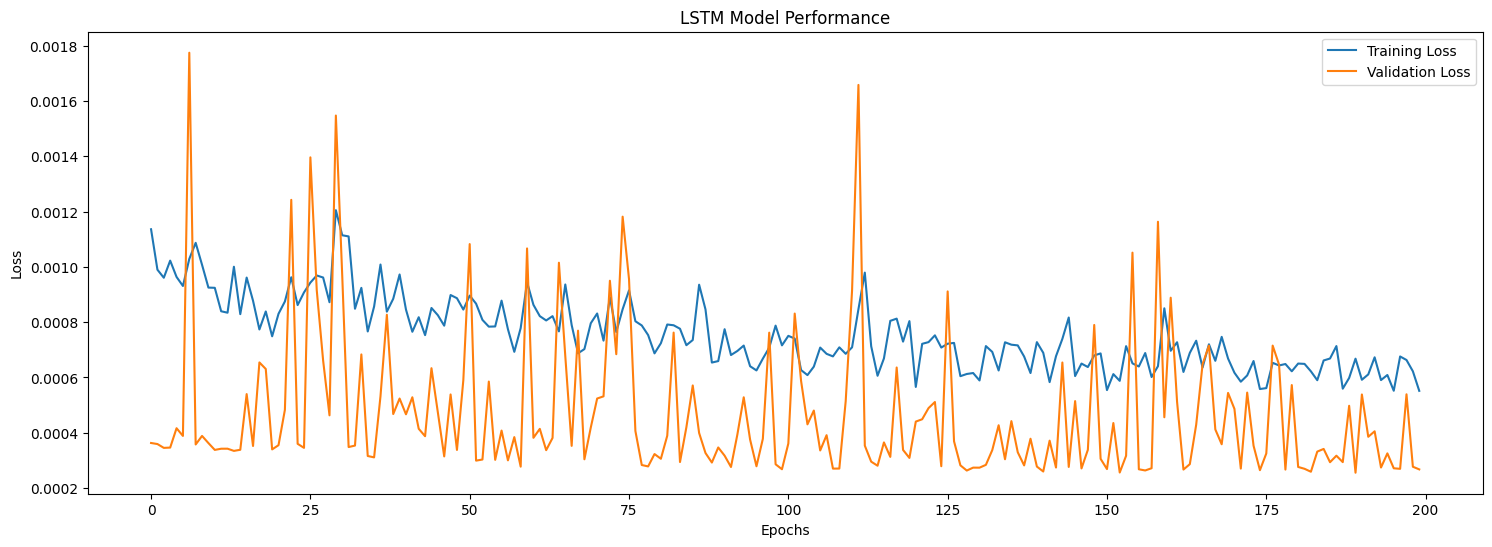

In [30]:
# Visualizing model performance during training
plt.figure(figsize=(18, 6))

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")

plt.title("LSTM Model Performance")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

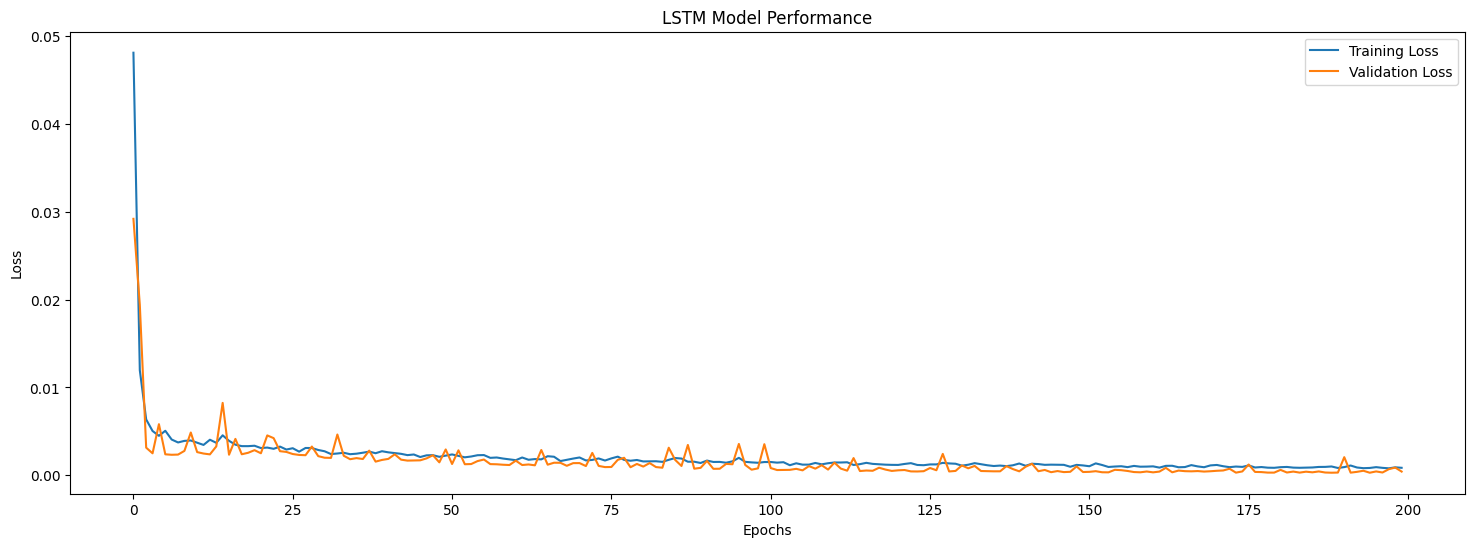

In [22]:
# Visualizing model performance during training
plt.figure(figsize=(18, 6))

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")

plt.title("LSTM Model Performance")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


The chart above highlights the following observations:
- Training loss values decrease over the epochs, starting from a higher value and gradually decreasing. This indicates that the model is learning to fit the training data better as training progresses.
- Similarly, the validation loss values also decrease initially, indicating improvement in the model's ability to generalize to unseen data (validation set).
- Some fluctuations in the validation loss have been observed, which is quite justifiable due to the high variations and complexity in the price performance over time.
- There are no signs of overfitting since both loss values are continuously decreasing along with each other over the epochs.
- Validation loss has maintained lower values than training loss across almost the whole training period, which is quite normal due to the complexity/size of training data.

### 6. MODEL INFERENCE

The LSTM model has been trained and evaluated, making it ready to forecast future price trends.

As mentioned earlier, we will employ our model to predict Google stock prices during the testing period. To thoroughly assess the model's performance, we will forecast stock performance for the entire period, including testing samples, and compare these predictions with actual prices.

#### Load Best Model

In [31]:
# Prepare model location and name
model_location = "..//models//"
model_name = "google_stock_price_lstm.model.keras"

# Load the best performing model
best_model = load_model(model_location + model_name)

#### Model Prediction

In [32]:
# Predict stock price for all data splits
y_train_predict = best_model.predict(X_train)
y_validate_predict = best_model.predict(X_validate)
y_test_predict = best_model.predict(X_test)

2/2 [==============================] - 0s 18ms/step


In [24]:
# Predict stock price for all data splits
y_train_predict = best_model.predict(X_train)
y_validate_predict = best_model.predict(X_validate)
y_test_predict = best_model.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


#### Inverse Scaling

One important thing to consider is the scale of the datasets, because the model was trained on scaled data that needs to be transformed back to its original price range.

Therefore, we have to load the same scaler used for transforming the original dataset and apply it to restore the prediction outputs to their actual distribution.

In [33]:
# Prepare scaler model name and location
scaler_model_location = "..//models//"
scaler_model_name = "google_stock_price_scaler"
scaler_model_ext = "gz"

# Store the scaler model
sc = joblib.load(scaler_model_location + scaler_model_name + "." + scaler_model_ext)

The scaler was initially fitted on data with 6 columns encompassing all the features considered. However, during the inverse transformation process, our focus is solely on transforming the "Open" price.

To circumvent potential errors triggered by the inverse_transform API, we create a container structure of the necessary shape. We populate the first column with predictions and subsequently disregard the others.

In [34]:
# Restore actual distribution for predicted prices
y_train_inv = sc.inverse_transform(np.concatenate((y_train.reshape(-1,1), np.ones((len(y_train.reshape(-1,1)), 5))), axis=1))[:,0]
y_validate_inv = sc.inverse_transform(np.concatenate((y_validate.reshape(-1,1), np.ones((len(y_validate.reshape(-1,1)), 5))), axis=1))[:,0]
y_test_inv = sc.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.ones((len(y_test.reshape(-1,1)), 5))), axis=1))[:,0]

y_train_predict_inv = sc.inverse_transform(np.concatenate((y_train_predict, np.ones((len(y_train_predict), 5))), axis=1))[:,0]
y_validate_predict_inv = sc.inverse_transform(np.concatenate((y_validate_predict, np.ones((len(y_validate_predict), 5))), axis=1))[:,0]
y_test_predict_inv = sc.inverse_transform(np.concatenate((y_test_predict, np.ones((len(y_test_predict), 5))), axis=1))[:,0]

#### Display Predictions

In [35]:
# Define chart colors
train_actual_color = "cornflowerblue"
validate_actual_color = "orange"
test_actual_color = "green"
train_predicted_color = "lightblue"
validate_predicted_color = "peru"
test_predicted_color = "limegreen"

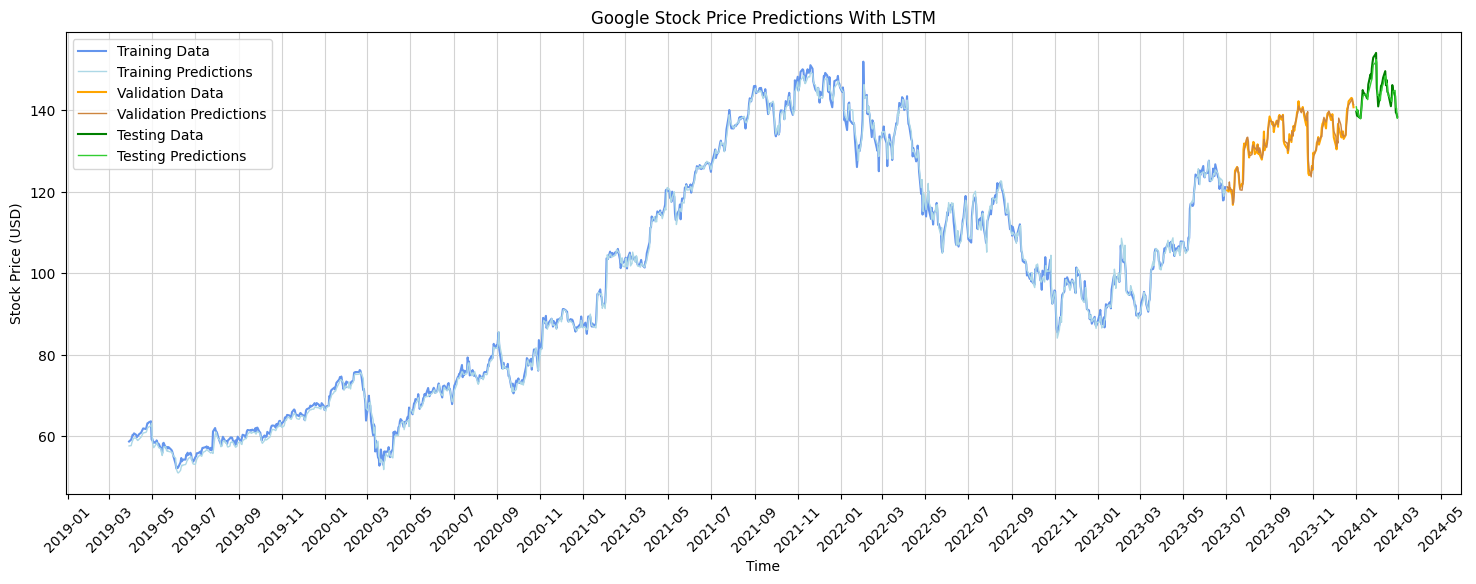

In [36]:
# Plot actual and predicted price
plt.figure(figsize=(18,6))
plt.plot(data_train_dates[sequence_size:,], y_train_inv, label="Training Data", color=train_actual_color)
plt.plot(data_train_dates[sequence_size:,], y_train_predict_inv, label="Training Predictions", linewidth=1, color=train_predicted_color)

plt.plot(data_validate_dates, y_validate_inv, label="Validation Data", color=validate_actual_color)
plt.plot(data_validate_dates, y_validate_predict_inv, label="Validation Predictions", linewidth=1, color=validate_predicted_color)

plt.plot(data_test_dates, y_test_inv, label="Testing Data", color=test_actual_color)
plt.plot(data_test_dates, y_test_predict_inv, label="Testing Predictions", linewidth=1, color=test_predicted_color)

plt.title("Google Stock Price Predictions With LSTM")
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.legend()
plt.grid(color="lightgray")

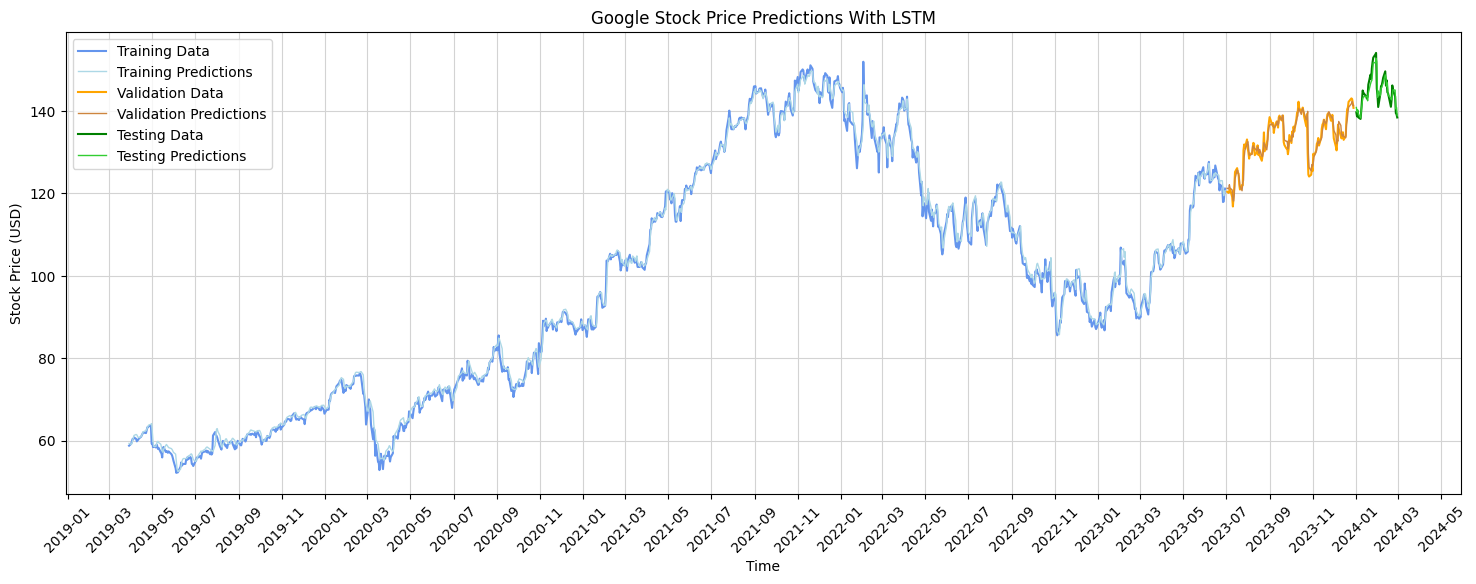

In [44]:
# Plot actual and predicted price
plt.figure(figsize=(18,6))
plt.plot(data_train_dates[sequence_size:,], y_train_inv, label="Training Data", color=train_actual_color)
plt.plot(data_train_dates[sequence_size:,], y_train_predict_inv, label="Training Predictions", linewidth=1, color=train_predicted_color)

plt.plot(data_validate_dates, y_validate_inv, label="Validation Data", color=validate_actual_color)
plt.plot(data_validate_dates, y_validate_predict_inv, label="Validation Predictions", linewidth=1, color=validate_predicted_color)

plt.plot(data_test_dates, y_test_inv, label="Testing Data", color=test_actual_color)
plt.plot(data_test_dates, y_test_predict_inv, label="Testing Predictions", linewidth=1, color=test_predicted_color)

plt.title("Google Stock Price Predictions With LSTM")
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.legend()
plt.grid(color="lightgray")

Based on this expanded overview, the model appears to perform very well throughout the observed period, with the predicted trend tends to align closely with actual stock performance across the three training, validation, and testing periods.

To better assess the model's predictions during the validation and testing periods, let's inspect a zoomed-in version of this chart covering the most recent samples.

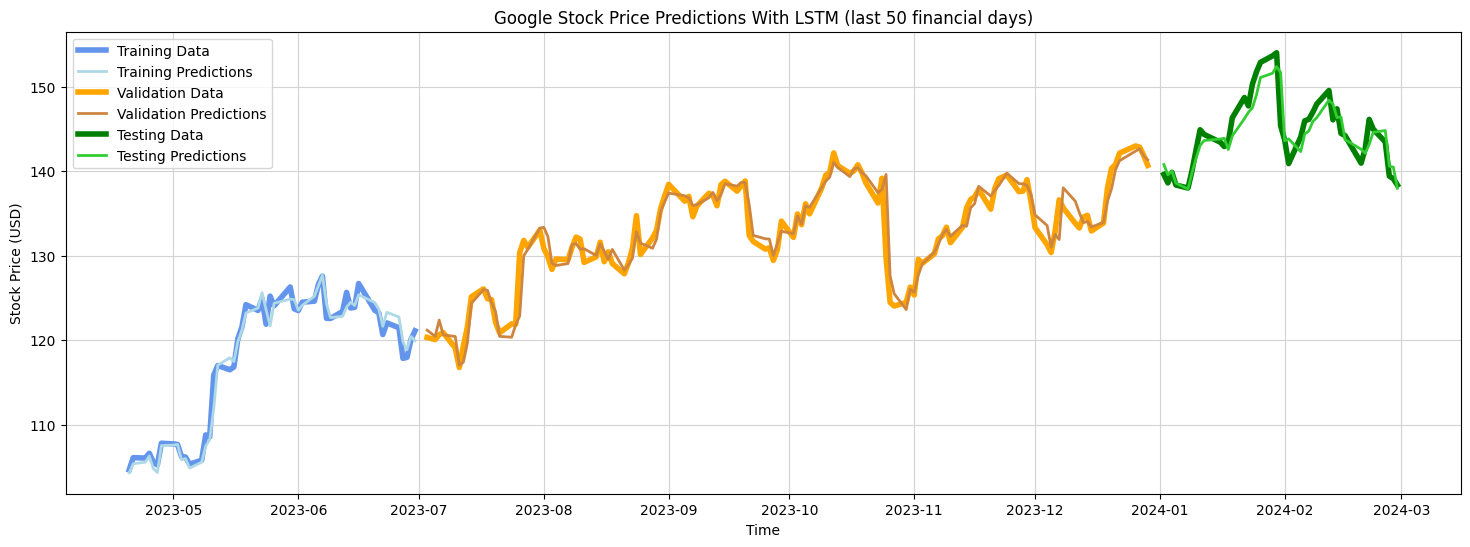

In [37]:
recent_samples = 50
plt.figure(figsize=(18,6))
plt.plot(data_train_dates[-recent_samples:,], y_train_inv[-recent_samples:,], label="Training Data", color=train_actual_color, linewidth=4)
plt.plot(data_train_dates[-recent_samples:,], y_train_predict_inv[-recent_samples:,], label="Training Predictions", linewidth=2, color=train_predicted_color)

plt.plot(data_validate_dates, y_validate_inv, label="Validation Data", color=validate_actual_color, linewidth=4)
plt.plot(data_validate_dates, y_validate_predict_inv, label="Validation Predictions", linewidth=2, color=validate_predicted_color)

plt.plot(data_test_dates, y_test_inv, label="Testing Data", color=test_actual_color, linewidth=4)
plt.plot(data_test_dates, y_test_predict_inv, label="Testing Predictions", linewidth=2, color=test_predicted_color)

plt.title("Google Stock Price Predictions With LSTM (last 50 financial days)")
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# plt.xticks(rotation=45)
plt.legend()
plt.grid(color="lightgray")

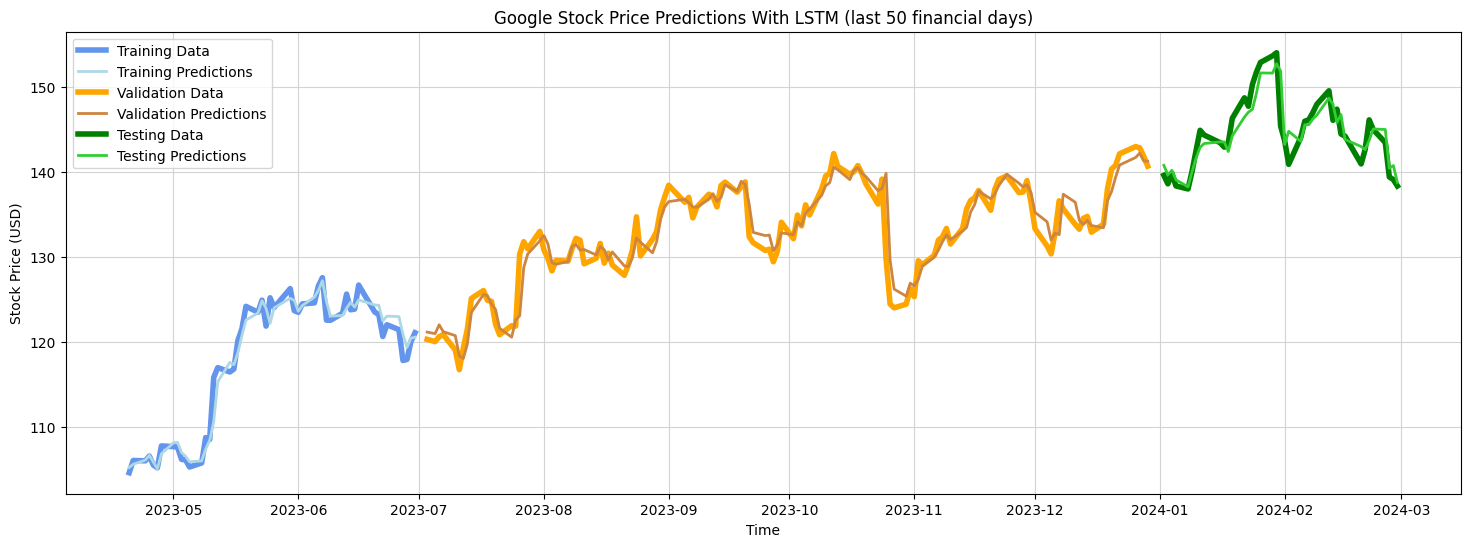

In [45]:
recent_samples = 50
plt.figure(figsize=(18,6))
plt.plot(data_train_dates[-recent_samples:,], y_train_inv[-recent_samples:,], label="Training Data", color=train_actual_color, linewidth=4)
plt.plot(data_train_dates[-recent_samples:,], y_train_predict_inv[-recent_samples:,], label="Training Predictions", linewidth=2, color=train_predicted_color)

plt.plot(data_validate_dates, y_validate_inv, label="Validation Data", color=validate_actual_color, linewidth=4)
plt.plot(data_validate_dates, y_validate_predict_inv, label="Validation Predictions", linewidth=2, color=validate_predicted_color)

plt.plot(data_test_dates, y_test_inv, label="Testing Data", color=test_actual_color, linewidth=4)
plt.plot(data_test_dates, y_test_predict_inv, label="Testing Predictions", linewidth=2, color=test_predicted_color)

plt.title("Google Stock Price Predictions With LSTM (last 50 financial days)")
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# plt.xticks(rotation=45)
plt.legend()
plt.grid(color="lightgray")

This closer look underscores the great performance of our LSTM model in predicting Google's stock prices during both validation and testing periods. Indicating the ability of this model to generalize on unseen data that was not included in the training set.

Despite the exact value predictions might be slightly different from real prices, the strong performance of this model is primarily derived from its ability to consistently mirror the actual trends across almost all phases. This is the most significant takeaway of stock price predictions analysis.

### Predicting 30 days ahead

1/1 [==============================] - 0s 30ms/step


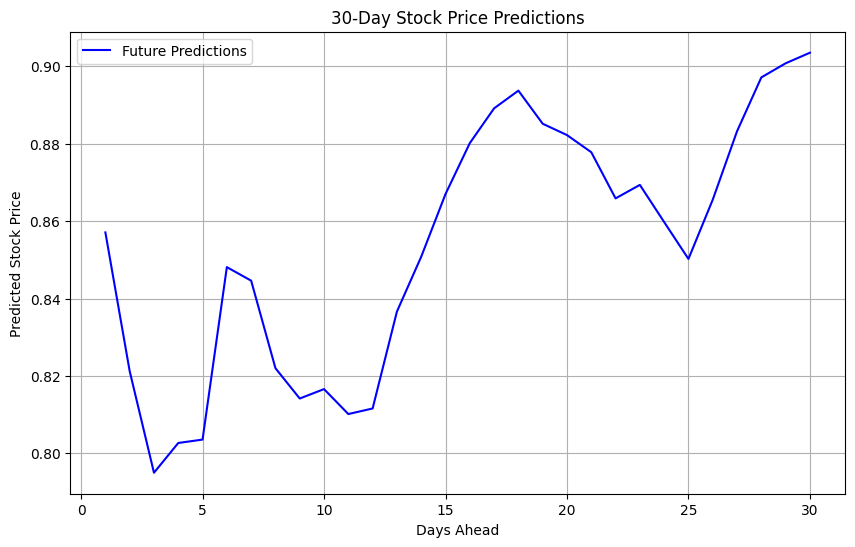

In [35]:
# Function to make future predictions
def predict_future(model, last_sequence, days_to_predict, scaler=None):
    """
    Predict stock prices for a specified number of future days.
    
    Parameters:
    - model: Trained LSTM model.
    - last_sequence: The most recent sequence of data (shape: [sequence_size, n_features]).
    - days_to_predict: Number of future days to predict.
    - scaler: Optional scaler used for inverse transformation.

    Returns:
    - future_predictions: Array of predicted values.
    """
    future_predictions = []

    current_sequence = last_sequence.copy()  # Start with the last known sequence

    for _ in range(days_to_predict):
        # Add batch dimension (1, sequence_size, n_features) for prediction
        current_sequence_batch = np.expand_dims(current_sequence, axis=0)
        next_prediction = model.predict(current_sequence_batch)[0, 0]  # Predict the next step

        # Append the predicted value
        future_predictions.append(next_prediction)

        # Update the current sequence by sliding it forward
        next_sequence = np.roll(current_sequence, -1, axis=0)
        next_sequence[-1, 0] = next_prediction  # Update the last value with the prediction
        current_sequence = next_sequence

    # If scaler is provided, inverse transform the predictions
    if scaler:
        future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

    return future_predictions

# Example usage:
# Assume `scaler` is the StandardScaler or MinMaxScaler used to preprocess the data
# Assume `model` is your trained LSTM model
# `X_test[-1]` is the last sequence from the test set
days_to_predict = 30
future_predictions = predict_future(model=regressor, 
                                     last_sequence=X_test[-1], 
                                     days_to_predict=days_to_predict, 
                                     scaler=None)  # Replace 'None' with your scaler if you have one

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(range(1, days_to_predict + 1), future_predictions, label="Future Predictions", color="blue")
plt.title("30-Day Stock Price Predictions")
plt.xlabel("Days Ahead")
plt.ylabel("Predicted Stock Price")
plt.legend()
plt.grid()
plt.show()

1/1 [==============================] - 0s 30ms/step


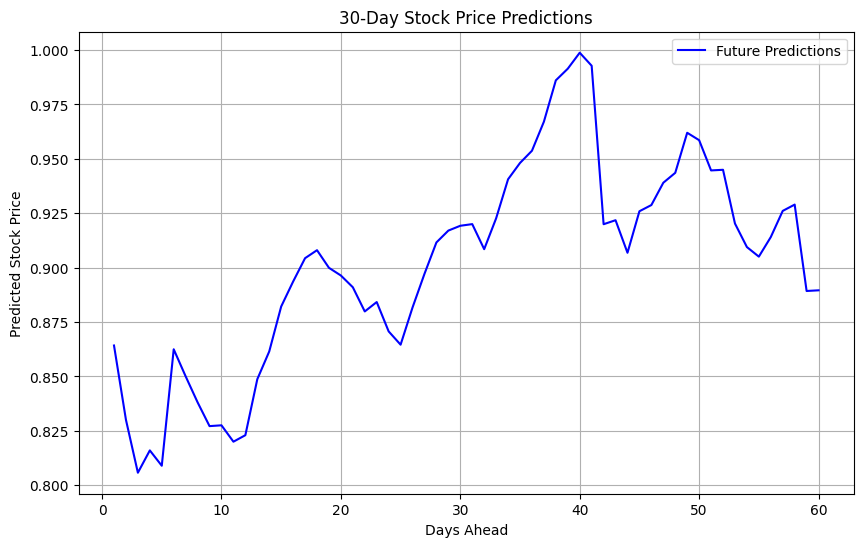

In [38]:
# Function to make future predictions
def predict_future(model, last_sequence, days_to_predict, scaler=None):
    """
    Predict stock prices for a specified number of future days.
    
    Parameters:
    - model: Trained LSTM model.
    - last_sequence: The most recent sequence of data (shape: [sequence_size, n_features]).
    - days_to_predict: Number of future days to predict.
    - scaler: Optional scaler used for inverse transformation.

    Returns:
    - future_predictions: Array of predicted values.
    """
    future_predictions = []

    current_sequence = last_sequence.copy()  # Start with the last known sequence

    for _ in range(days_to_predict):
        # Add batch dimension (1, sequence_size, n_features) for prediction
        current_sequence_batch = np.expand_dims(current_sequence, axis=0)
        next_prediction = model.predict(current_sequence_batch)[0, 0]  # Predict the next step

        # Append the predicted value
        future_predictions.append(next_prediction)

        # Update the current sequence by sliding it forward
        next_sequence = np.roll(current_sequence, -1, axis=0)
        next_sequence[-1, 0] = next_prediction  # Update the last value with the prediction
        current_sequence = next_sequence

    # If scaler is provided, inverse transform the predictions
    if scaler:
        future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

    return future_predictions

# Example usage:
# Assume `scaler` is the StandardScaler or MinMaxScaler used to preprocess the data
# Assume `model` is your trained LSTM model
# `X_test[-1]` is the last sequence from the test set
days_to_predict = 60
future_predictions = predict_future(model=regressor, 
                                     last_sequence=X_test[-1], 
                                     days_to_predict=days_to_predict, 
                                     scaler=None)  # Replace 'None' with your scaler if you have one

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(range(1, days_to_predict + 1), future_predictions, label="Future Predictions", color="blue")
plt.title("30-Day Stock Price Predictions")
plt.xlabel("Days Ahead")
plt.ylabel("Predicted Stock Price")
plt.legend()
plt.grid()
plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

[*********************100%***********************]  1 of 1 completed


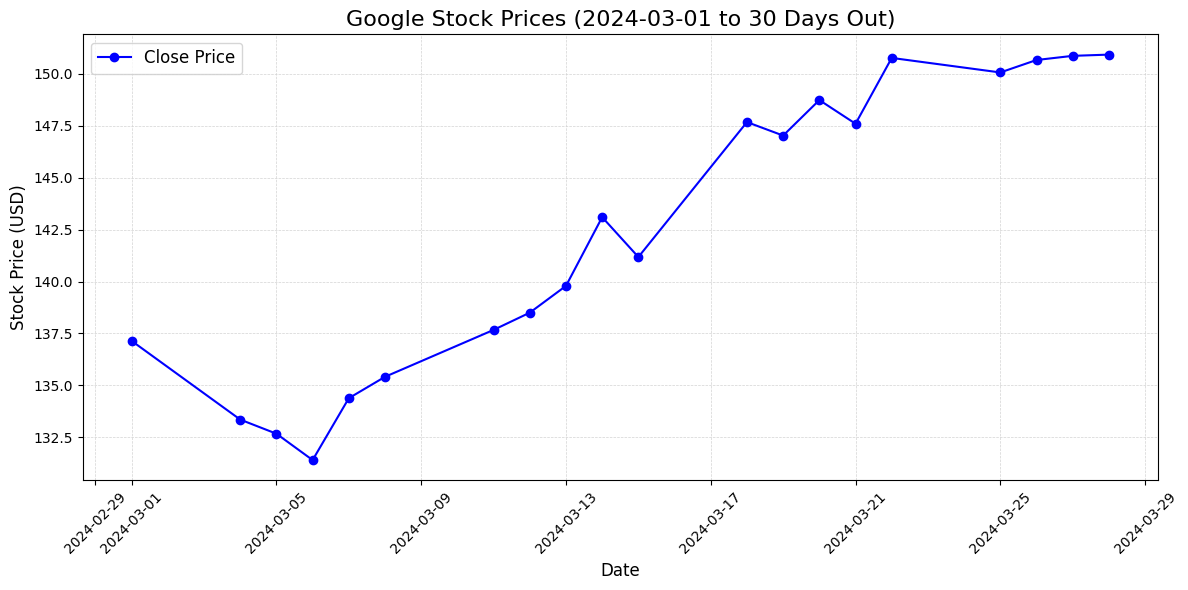

In [39]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Download actual stock data for Google
start_date = "2024-03-01"
end_date = pd.Timestamp(start_date) + pd.DateOffset(days=30)
stock_data = yf.download("GOOGL", start=start_date, end=end_date.strftime("%Y-%m-%d"))

# Plot the Close prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], marker='o', linestyle='-', label="Close Price", color="blue")

# Add titles and labels
plt.title("Google Stock Prices (2024-03-01 to 30 Days Out)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)

# Rotate x-axis for better readability
plt.xticks(rotation=45)

# Add grid and legend
plt.grid(color="lightgray", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed


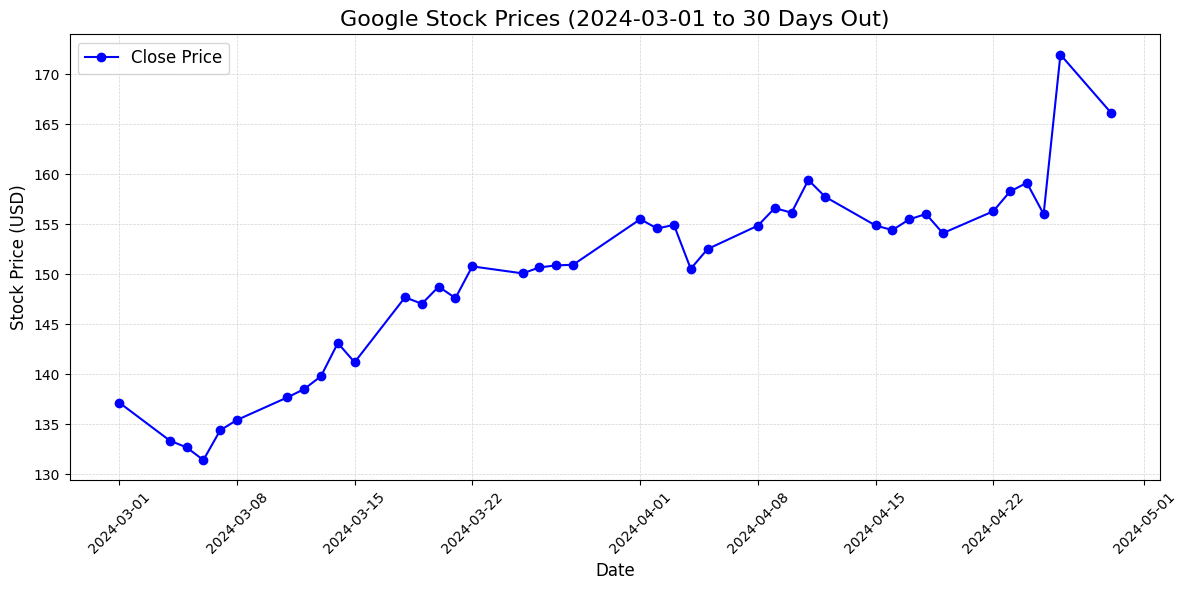

In [39]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Download actual stock data for Google
start_date = "2024-03-01"
end_date = pd.Timestamp(start_date) + pd.DateOffset(days=60)
stock_data = yf.download("GOOGL", start=start_date, end=end_date.strftime("%Y-%m-%d"))

# Plot the Close prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], marker='o', linestyle='-', label="Close Price", color="blue")

# Add titles and labels
plt.title("Google Stock Prices (2024-03-01 to 30 Days Out)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)

# Rotate x-axis for better readability
plt.xticks(rotation=45)

# Add grid and legend
plt.grid(color="lightgray", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Transform

In [50]:
def predict_future(model, last_sequence, days_to_predict, scaler=sc):
    """
    Predict stock prices for a specified number of future days and transform to actual prices if a scaler is provided.

    Parameters:
    - model: Trained LSTM model.
    - last_sequence: The most recent sequence of data (shape: [sequence_size, n_features]).
    - days_to_predict: Number of future days to predict.
    - scaler: Scaler object used for data preprocessing (e.g., MinMaxScaler).

    Returns:
    - future_predictions: Array of predicted values in the original scale.
    """
    future_predictions = []
    current_sequence = last_sequence.copy()  # Start with the last known sequence

    for _ in range(days_to_predict):
        # Add batch dimension (1, sequence_size, n_features) for prediction
        current_sequence_batch = np.expand_dims(current_sequence, axis=0)
        next_prediction = model.predict(current_sequence_batch)[0, 0]  # Predict the next step

        # Append the predicted value
        future_predictions.append(next_prediction)

        # Update the current sequence by sliding it forward
        next_sequence = np.roll(current_sequence, -1, axis=0)
        next_sequence[-1, 0] = next_prediction  # Update the last value with the prediction
        current_sequence = next_sequence

    # Apply inverse transformation if a scaler is provided
    if scaler:
        future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

    return future_predictions


In [52]:
# Example usage
days_to_predict = 30

# Replace `None` with your scaler (e.g., MinMaxScaler or StandardScaler used during preprocessing)
future_predictions = predict_future(
    model=regressor, 
    last_sequence=X_test[-1], 
    days_to_predict=days_to_predict, 
    scaler=sc  # Pass the scaler used during training
)

# Visualize the predictions with actual prices
plt.figure(figsize=(10, 6))
plt.plot(range(1, days_to_predict + 1), future_predictions, label="Future Predictions (Actual Prices)", color="blue")
plt.title("30-Day Stock Price Predictions (Actual Prices)")
plt.xlabel("Days Ahead")
plt.ylabel("Predicted Stock Price (USD)")
plt.legend()
plt.grid()
plt.show()

1/1 [==============================] - 0s 35ms/step


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# until EOY, last day Nov

1/1 [==============================] - 0s 33ms/step


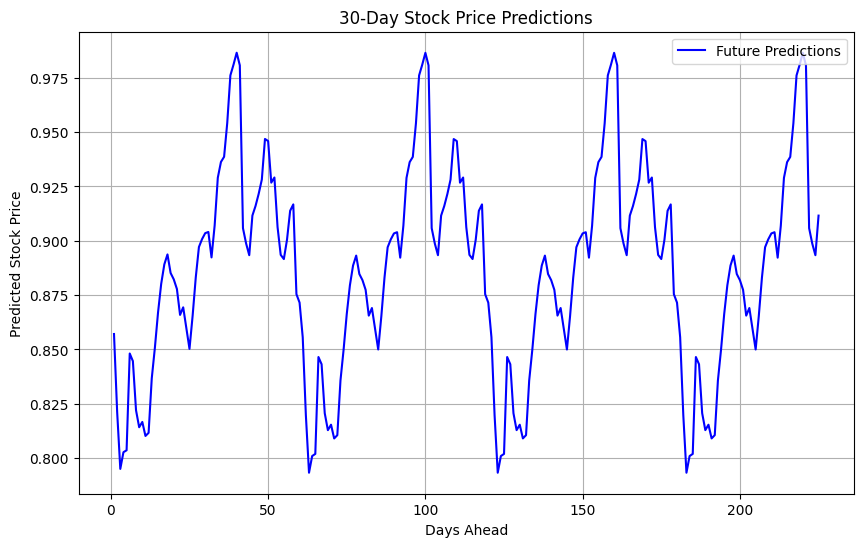

In [53]:
# Function to make future predictions
def predict_future(model, last_sequence, days_to_predict, scaler=None):
    """
    Predict stock prices for a specified number of future days.
    
    Parameters:
    - model: Trained LSTM model.
    - last_sequence: The most recent sequence of data (shape: [sequence_size, n_features]).
    - days_to_predict: Number of future days to predict.
    - scaler: Optional scaler used for inverse transformation.

    Returns:
    - future_predictions: Array of predicted values.
    """
    future_predictions = []

    current_sequence = last_sequence.copy()  # Start with the last known sequence

    for _ in range(days_to_predict):
        # Add batch dimension (1, sequence_size, n_features) for prediction
        current_sequence_batch = np.expand_dims(current_sequence, axis=0)
        next_prediction = model.predict(current_sequence_batch)[0, 0]  # Predict the next step

        # Append the predicted value
        future_predictions.append(next_prediction)

        # Update the current sequence by sliding it forward
        next_sequence = np.roll(current_sequence, -1, axis=0)
        next_sequence[-1, 0] = next_prediction  # Update the last value with the prediction
        current_sequence = next_sequence

    # If scaler is provided, inverse transform the predictions
    if scaler:
        future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

    return future_predictions

# Example usage:
# Assume `scaler` is the StandardScaler or MinMaxScaler used to preprocess the data
# Assume `model` is your trained LSTM model
# `X_test[-1]` is the last sequence from the test set
days_to_predict = 225
future_predictions = predict_future(model=regressor, 
                                     last_sequence=X_test[-1], 
                                     days_to_predict=days_to_predict, 
                                     scaler=None)  # Replace 'None' with your scaler if you have one

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(range(1, days_to_predict + 1), future_predictions, label="Future Predictions", color="blue")
plt.title("30-Day Stock Price Predictions")
plt.xlabel("Days Ahead")
plt.ylabel("Predicted Stock Price")
plt.legend()
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


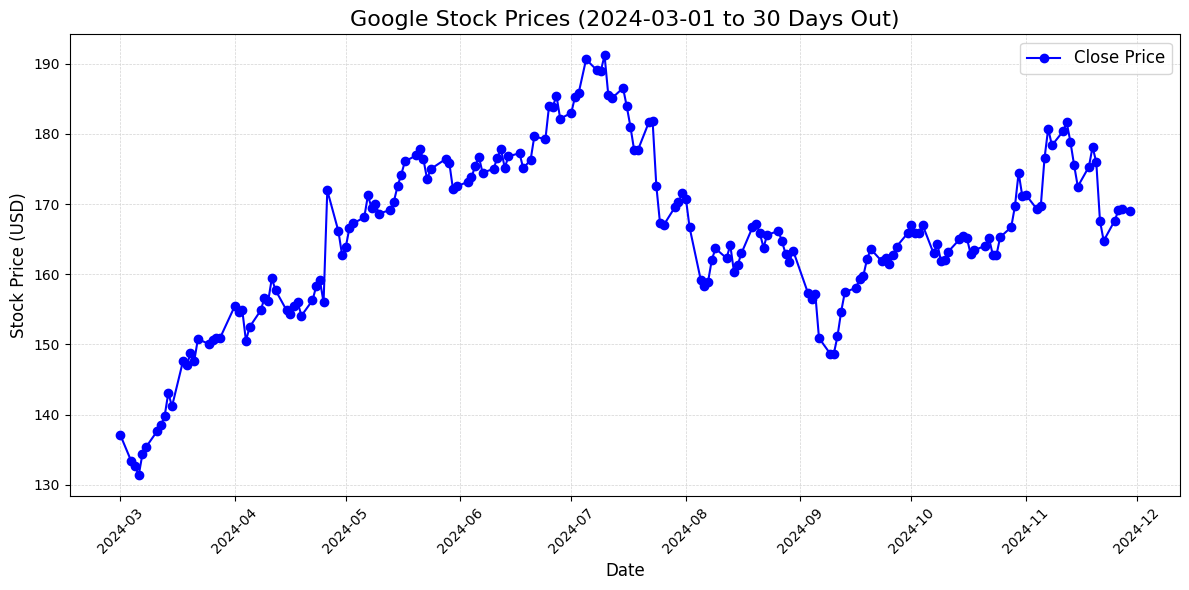

In [54]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Download actual stock data for Google
start_date = "2024-03-01"
end_date = "2024-12-01"#pd.Timestamp(start_date) + pd.DateOffset(days=30)
stock_data = yf.download("GOOGL", start=start_date, end=end_date)  #end=end_date.strftime("%Y-%m-%d")

# Plot the Close prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], marker='o', linestyle='-', label="Close Price", color="blue")

# Add titles and labels
plt.title("Google Stock Prices (2024-03-01 to 30 Days Out)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)

# Rotate x-axis for better readability
plt.xticks(rotation=45)

# Add grid and legend
plt.grid(color="lightgray", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()